# Linear Regression - Mini-Project 1


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [197]:
# check the datatypes of the columns
df.info()
# check if there are columns with null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [198]:
# get a first look at the data
df.describe()

year     condition
count  46578.000000  46578.000000
mean    2010.203401      3.424265
std        3.831316      0.944009
min     1990.000000      1.000000
25%     2008.000000      2.700000
50%     2012.000000      3.600000
75%     2013.000000      4.200000
max     2015.000000      5.000000

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [199]:
# Convert saledate column from object to datetime datatype (UTC- Universal Time Coordinated=True, because of the different timezones)
df['saledate']=pd.to_datetime(df['saledate'],utc=True)
# Remove $ and convert mmr and sellingprice to integer and odometer to float
df['mmr']=df['mmr'].str.replace('$',"").astype(int)
df['sellingprice']=df['sellingprice'].str.replace('$',"").astype(int)
df['odometer']=df['odometer'].str.replace('mi',"").astype(float)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          46578 non-null  int64              
 1   make          46578 non-null  object             
 2   model         46578 non-null  object             
 3   trim          46578 non-null  object             
 4   body          46578 non-null  object             
 5   transmission  46578 non-null  object             
 6   vin           46578 non-null  object             
 7   state         46578 non-null  object             
 8   condition     46578 non-null  float64            
 9   odometer      46578 non-null  float64            
 10  color         46578 non-null  object             
 11  interior      46578 non-null  object             
 12  seller        46578 non-null  object             
 13  mmr           46578 non-null  int32              
 14  sellin

year     make         model   trim          body transmission  \
0  2013  Hyundai        Sonata    GLS         sedan    automatic   
1  2014   Toyota       4Runner    SR5           SUV    automatic   
2  2012    Lexus        IS 250   Base         Sedan    automatic   
3  2002      BMW            X5   4.4i           SUV    automatic   
4  2014     Ford  E-Series Van  E-250  E-Series Van    automatic   

                 vin state  condition  odometer   color interior  \
0  5npeb4acxdh702805    ma        3.9   50404.0   black     gray   
1  jtezu5jr2e5064567    fl        4.9   17846.0    gray        —   
2  jthbf5c24c5168599    fl        4.1   21122.0  silver    black   
3  5uxfb33562lh33864    fl        1.9  145303.0   black    black   
4  1ftne2ew0eda31832    wa        4.9    6714.0   white     gray   

                             seller    mmr  sellingprice  \
0             the hertz corporation  11000         10900   
1  award auto sales and leasing inc  28700         29900   
2          lexus financial services  22200         24200   
3                        peddle llc   3675          3200   
4                            u-haul  22500         22100   

                   saledate  
0 2015-06-01 19:30:00+00:00  
1 2015-02-17 23:15:00+00:00  
2 2015-01-19 17:30:00+00:00  
3 2015-03-03 23:10:00+00:00  
4 2015-02-17 22:45:00+00:00

In [200]:
# we replace the numerical column called 'condition' with a categorical column instead
# condition_category=pd.cut(df['condition'],bins=[1,2,3,4,5],labels=['very bad','bad','good','very good'])
# df['condition group']=condition_category
# # df=df.drop('condition',axis=1)
# df.sample(15)

After a closer look at the dataframe, it was discovered that the columns 'color' and 'interior' contain '—' as a value, let's remove those

In [201]:
# check if other columns have this issue
# df.shape                    #(46578, 17)
df.isin(['—']).any()   #No only 'color' and 'interior' contain '—'
# Remove — from color
df.drop(df[df['color']=='—'].index,inplace=True)
# Remove — from interior
df.drop(df[df['interior']=='—'].index,inplace=True)
# df.shape                       #(43344, 17)
df.isin(['—']).any()    # '—' is removed

year            False
make            False
model           False
trim            False
body            False
transmission    False
vin             False
state           False
condition       False
odometer        False
color           False
interior        False
seller          False
mmr             False
sellingprice    False
saledate        False
dtype: bool

Reduce the ’body’ categories into a few main types, namely: Sedan, Coupe, Convertible, Hatchback, SUV,
Minivan, Wagon, and Pickup Truck. Note: pickup trucks are indicated by their different cab types in the
‘body’ column.

In [202]:
# Group different cab types as Pickup truck etc..
df['body'] = df.body.str.replace(r'((?i)^.*Cab.*$)', 'Pickup Truck')
df['body'] = df.body.str.replace(r'((?i)^.*sedan.*$)', 'Sedan')
df['body'] = df.body.str.replace(r'((?i)^.*coupe.*$)', 'Coupe')
df['body'] = df.body.str.replace(r'((?i)^.*Suv.*$)', 'SUV')
df['body'] = df.body.str.replace(r'((?i)^.*wagon.*$)', 'Wagon')
df['body'] = df.body.str.replace(r'((?i)^.*convertible.*$)', 'Convertible')
df['body'] = df.body.str.replace(r'((?i)^.*van.*$)', 'Minivan')
# filter out other body types
df=df[df['body'].isin(['Sedan','Coupe','Convertible','Hatchback','SUV','Minivan','Wagon','Pickup Truck'])]
df.head()

year     make         model   trim     body transmission  \
0  2013  Hyundai        Sonata    GLS    Sedan    automatic   
2  2012    Lexus        IS 250   Base    Sedan    automatic   
3  2002      BMW            X5   4.4i      SUV    automatic   
4  2014     Ford  E-Series Van  E-250  Minivan    automatic   
5  2014      Kia        Optima     LX    Sedan    automatic   

                 vin state  condition  odometer   color interior  \
0  5npeb4acxdh702805    ma        3.9   50404.0   black     gray   
2  jthbf5c24c5168599    fl        4.1   21122.0  silver    black   
3  5uxfb33562lh33864    fl        1.9  145303.0   black    black   
4  1ftne2ew0eda31832    wa        4.9    6714.0   white     gray   
5  5xxgm4a70eg329048    co        4.6    8386.0   black     gray   

                     seller    mmr  sellingprice                  saledate  
0     the hertz corporation  11000         10900 2015-06-01 19:30:00+00:00  
2  lexus financial services  22200         24200 2015-01-19 17:30:00+00:00  
3                peddle llc   3675          3200 2015-03-03 23:10:00+00:00  
4                    u-haul  22500         22100 2015-02-17 22:45:00+00:00  
5   kia motors america, inc  15100         15500 2015-06-15 22:00:00+00:00

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<AxesSubplot: xlabel='color', ylabel='count'>

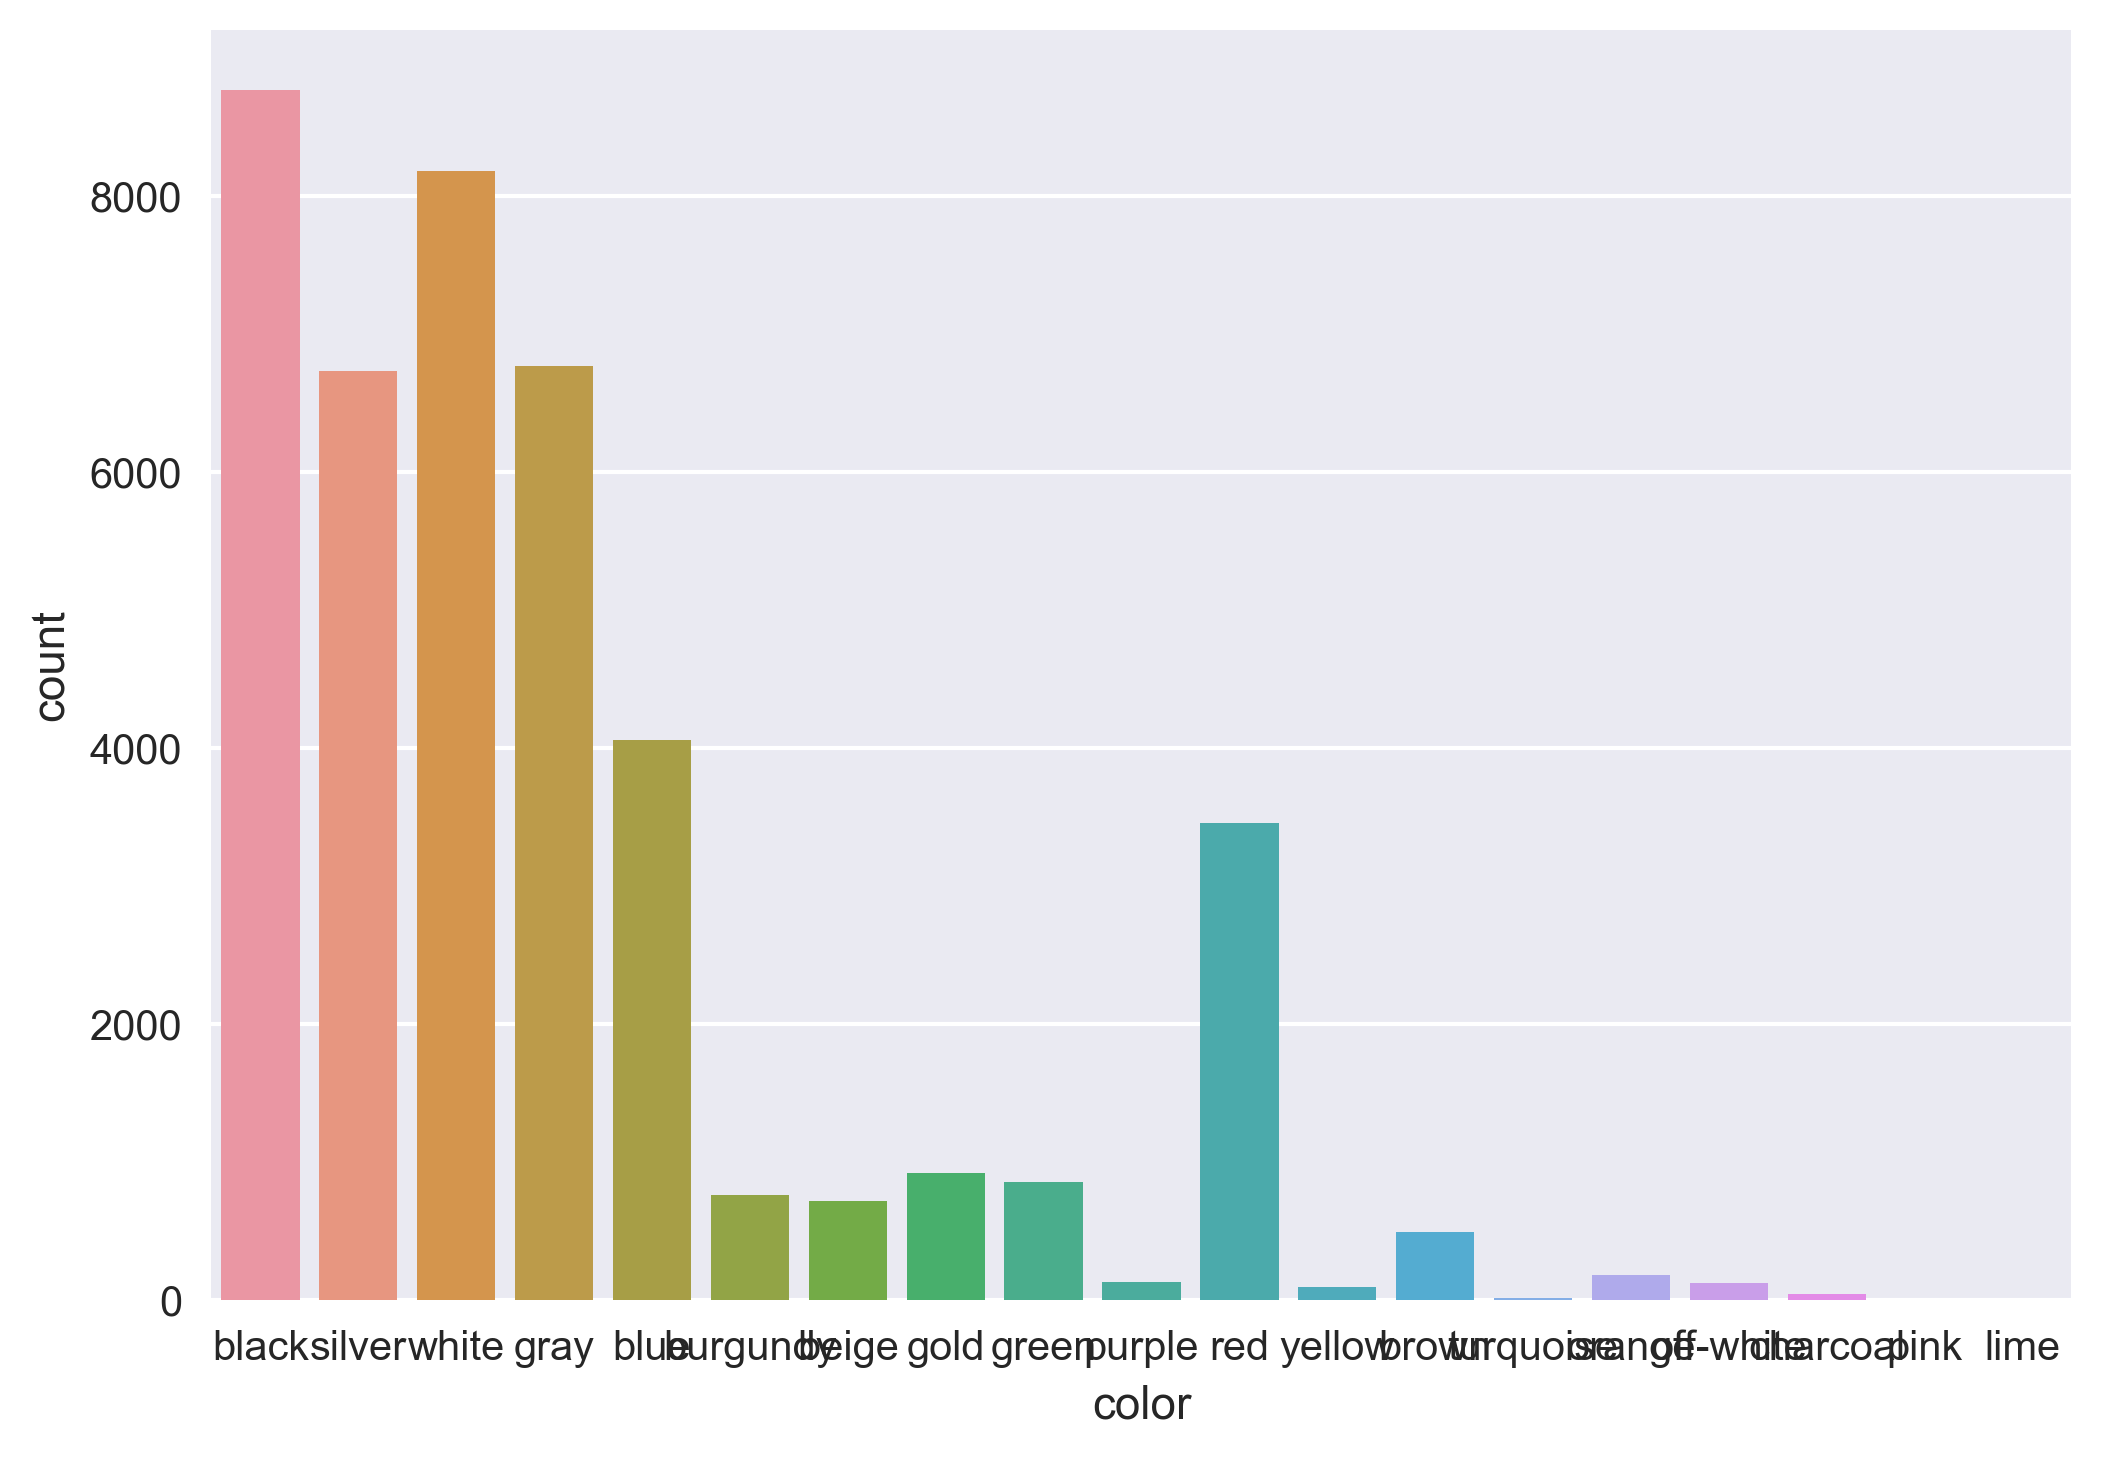

In [203]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

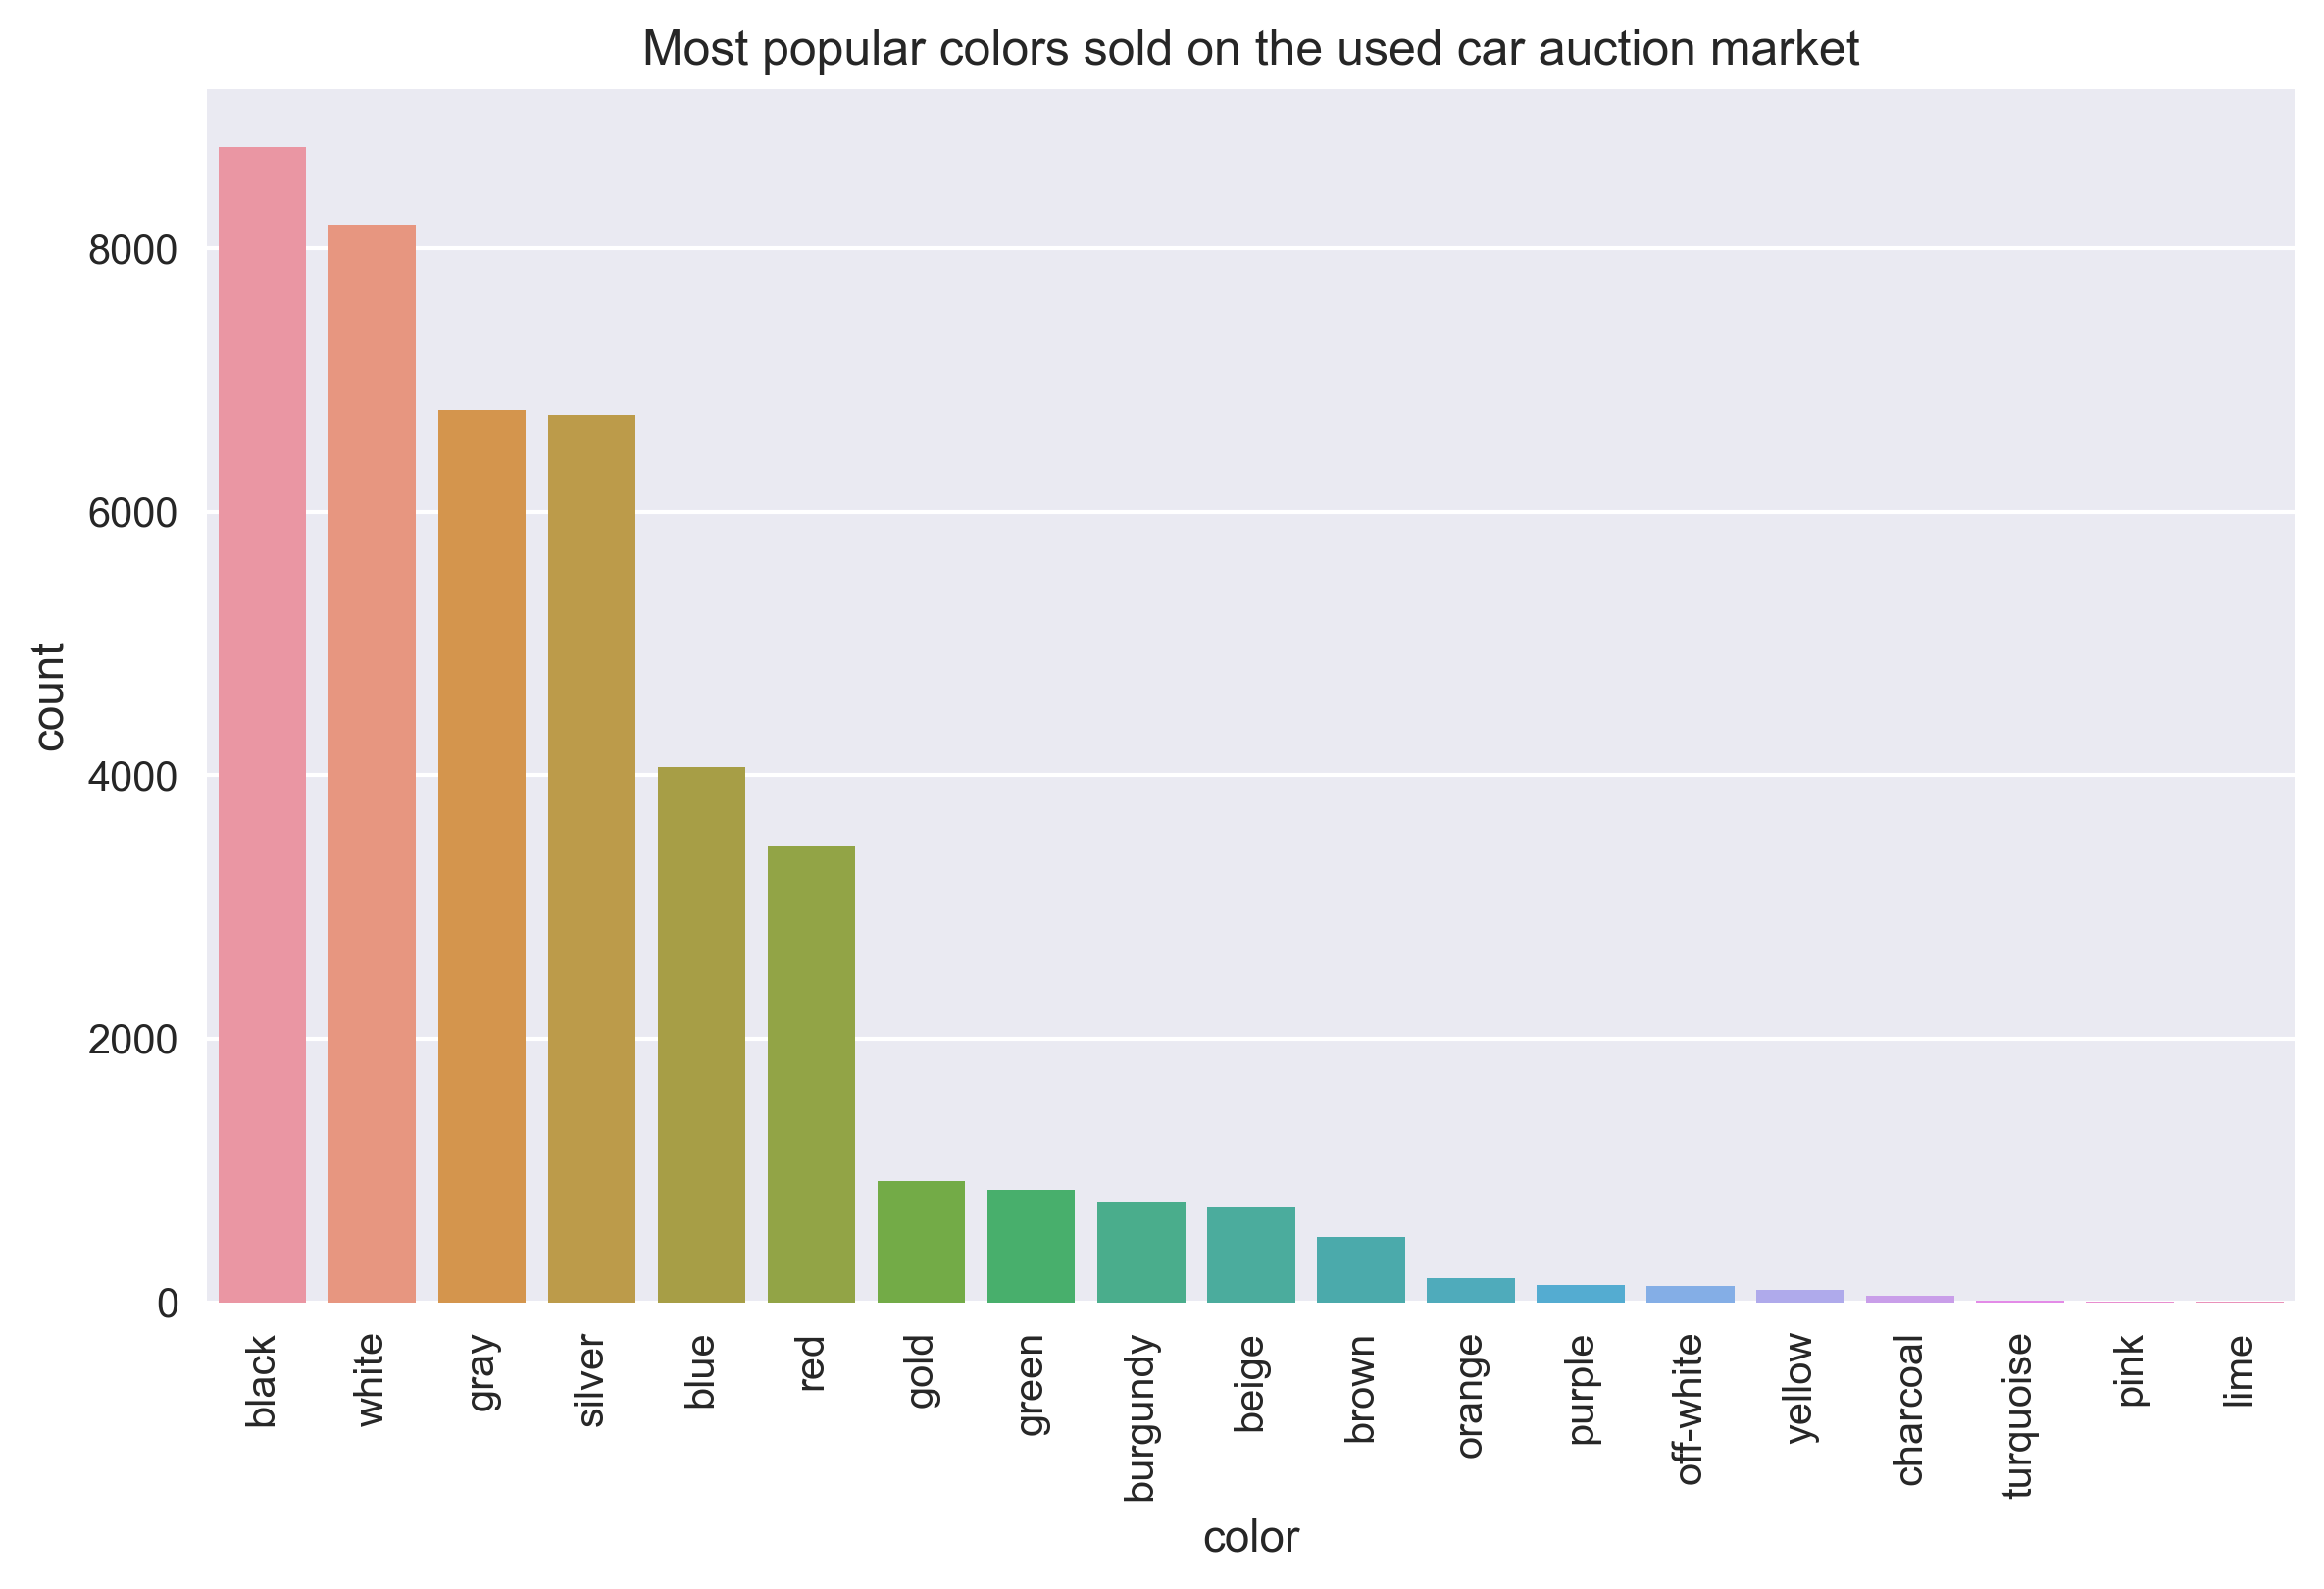

In [204]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

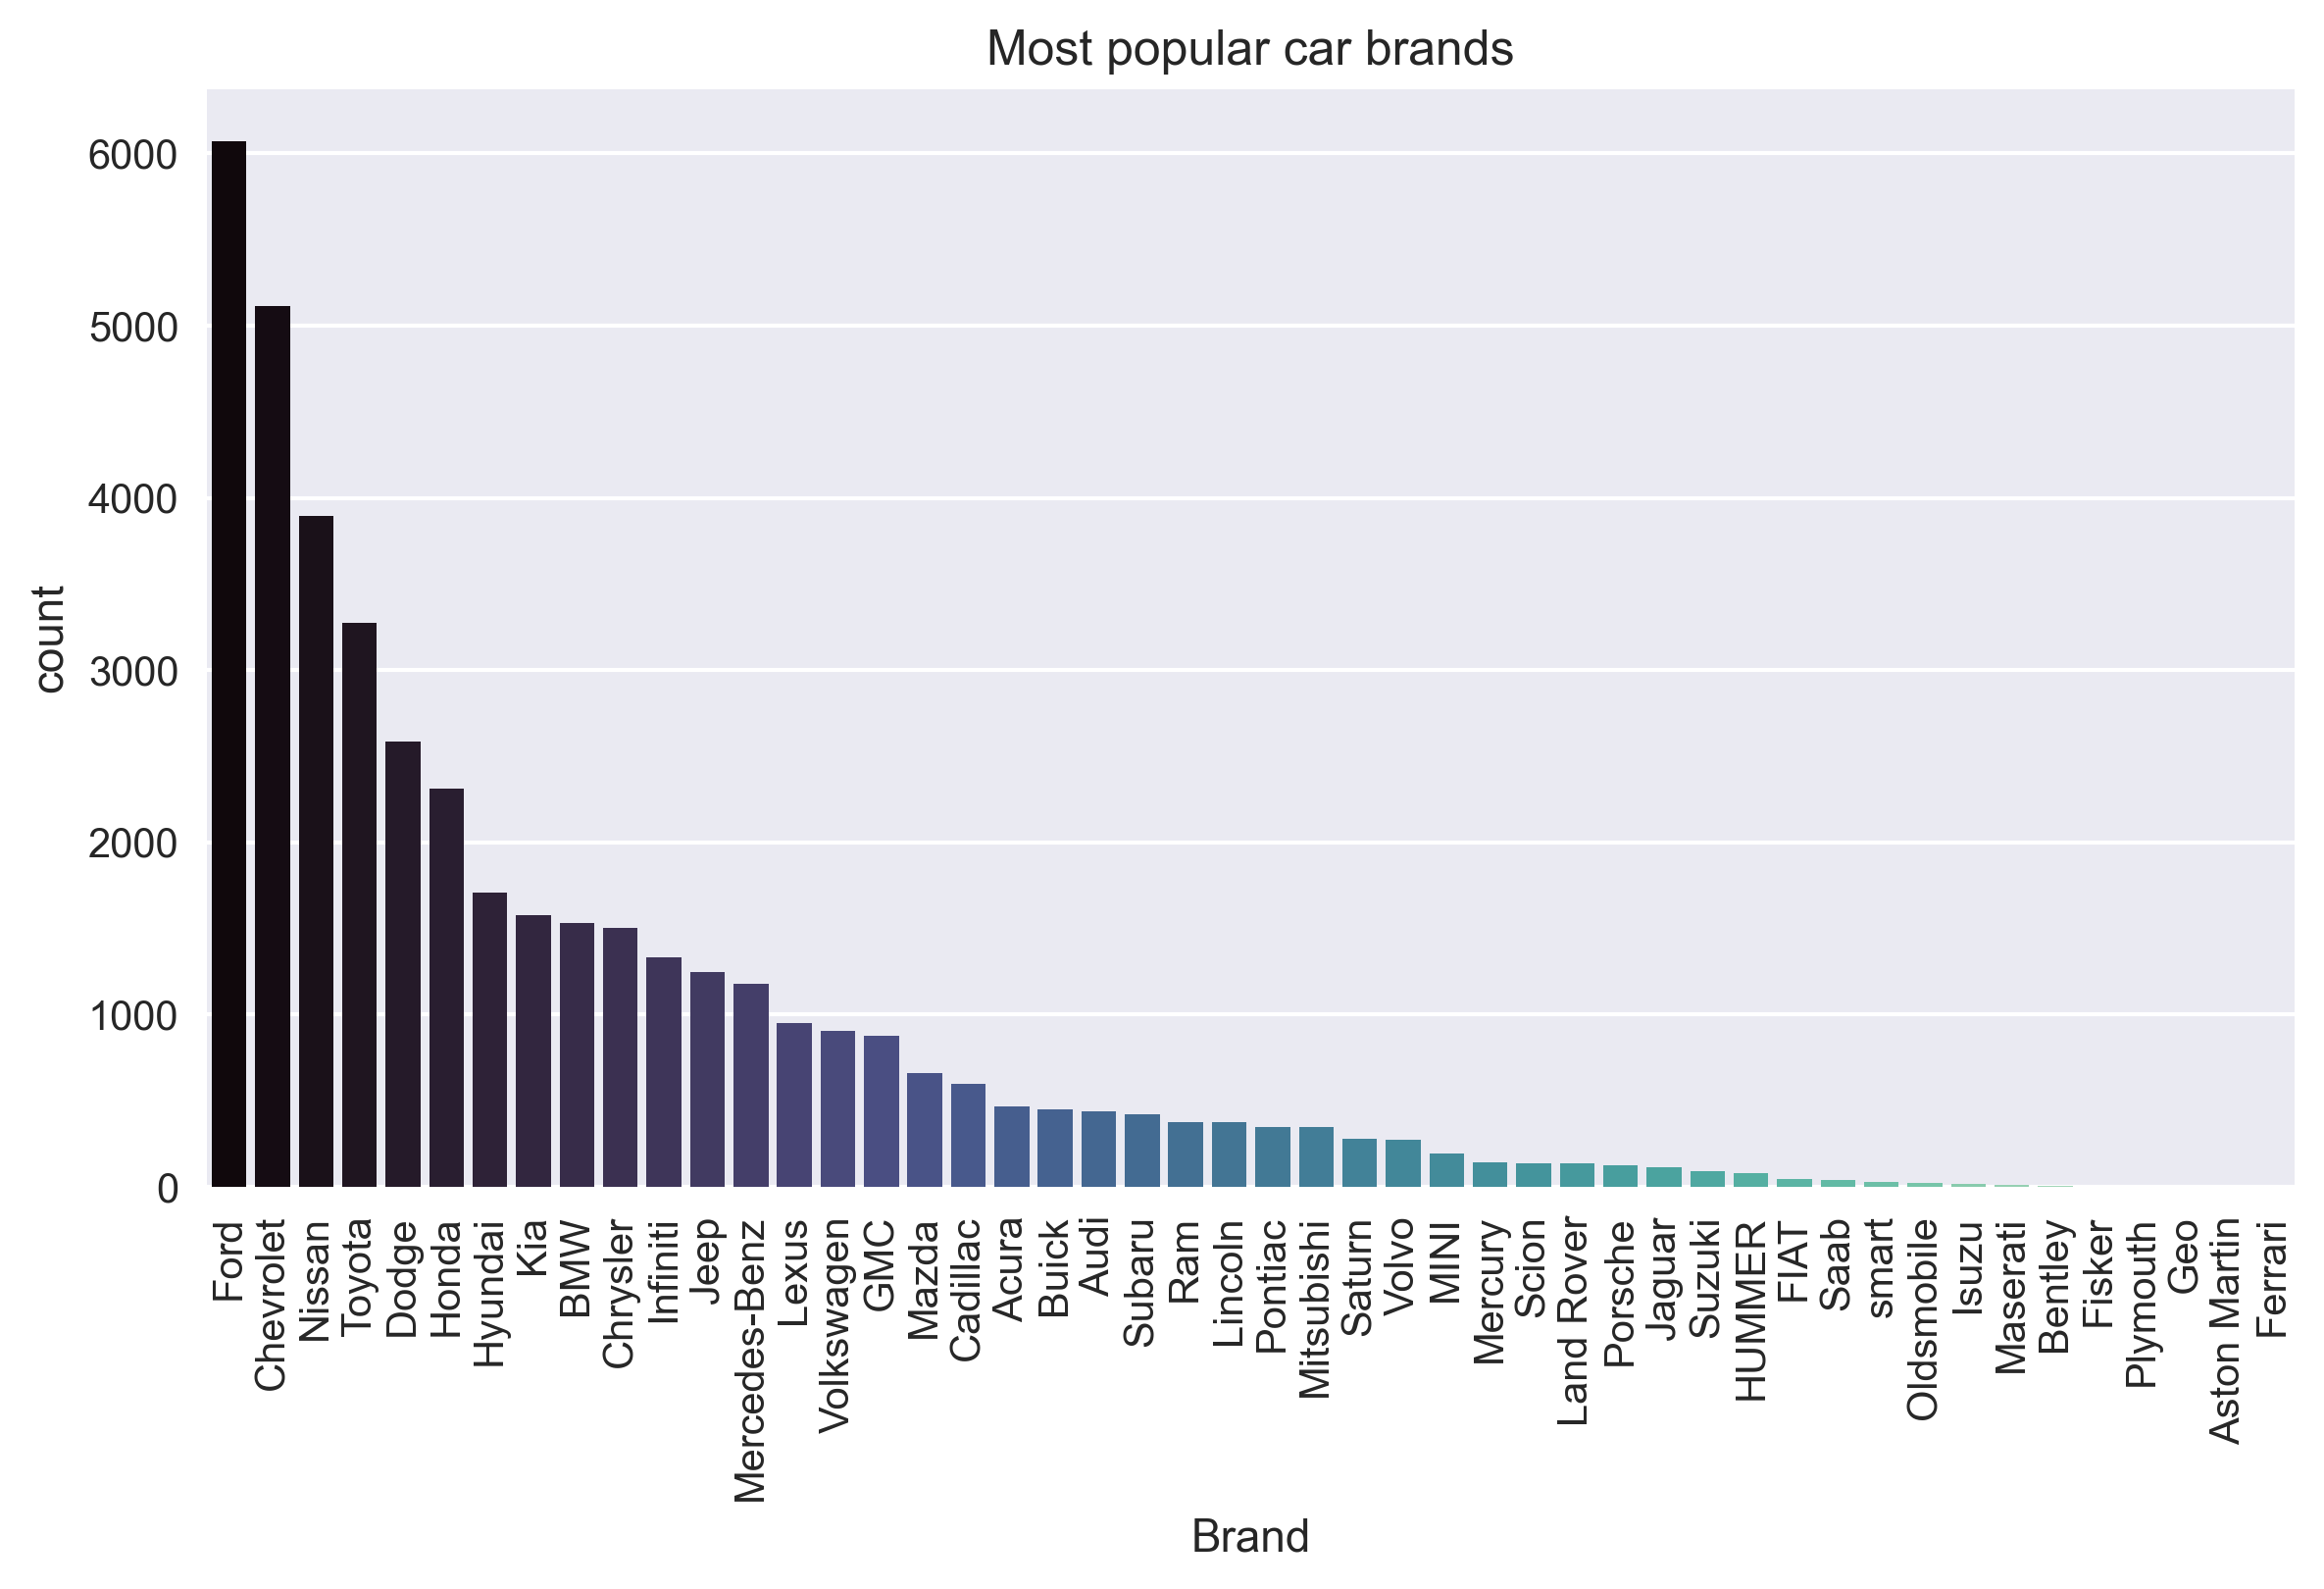

In [205]:
make_grouped=df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make',data=df,palette='mako',order=make_grouped.index).set(title='Most popular car brands',xlabel='Brand')
plt.xticks(rotation=90)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.tight_layout()

**Answer for Q1**: Your answer here

The most popular car brand is Ford, followed by Chevrolet and then Nissan and Toyota

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

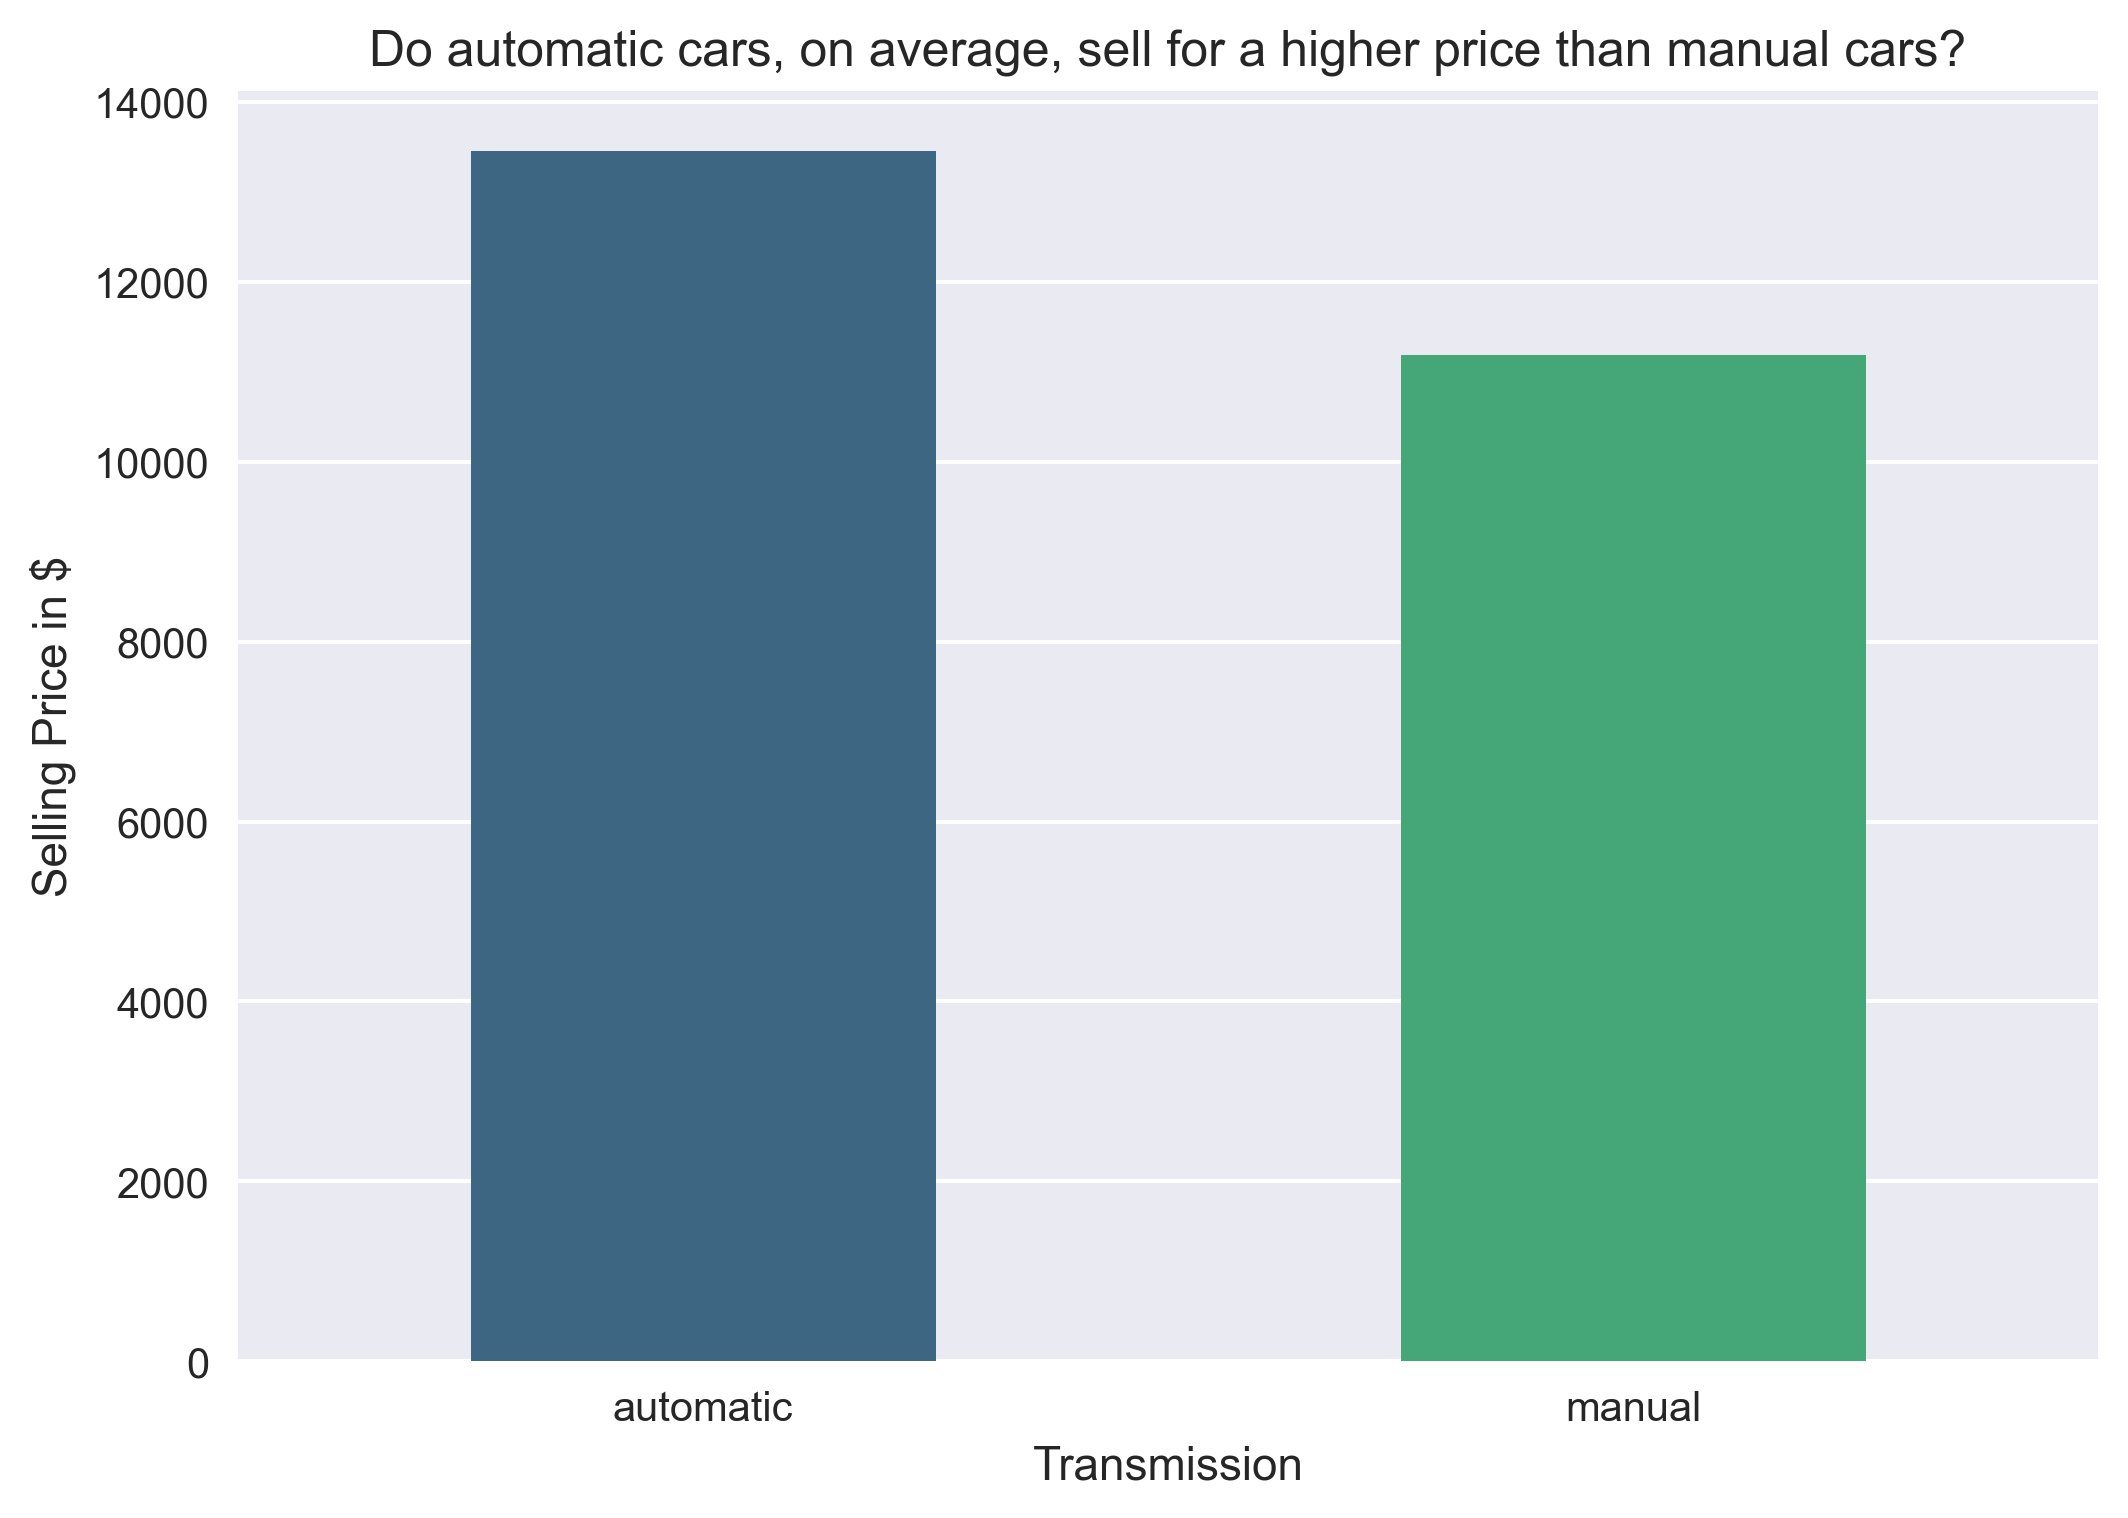

In [206]:
sns.barplot(x='transmission',y='sellingprice',palette='viridis',data=df,ci=False,width=0.5).set(title
='Do automatic cars, on average, sell for a higher price than manual cars?',xlabel='Transmission',ylabel='Selling Price in $')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

**Answer for Q2**: Your answer here

Yes automatic cars sell for higher on average than manual cars.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

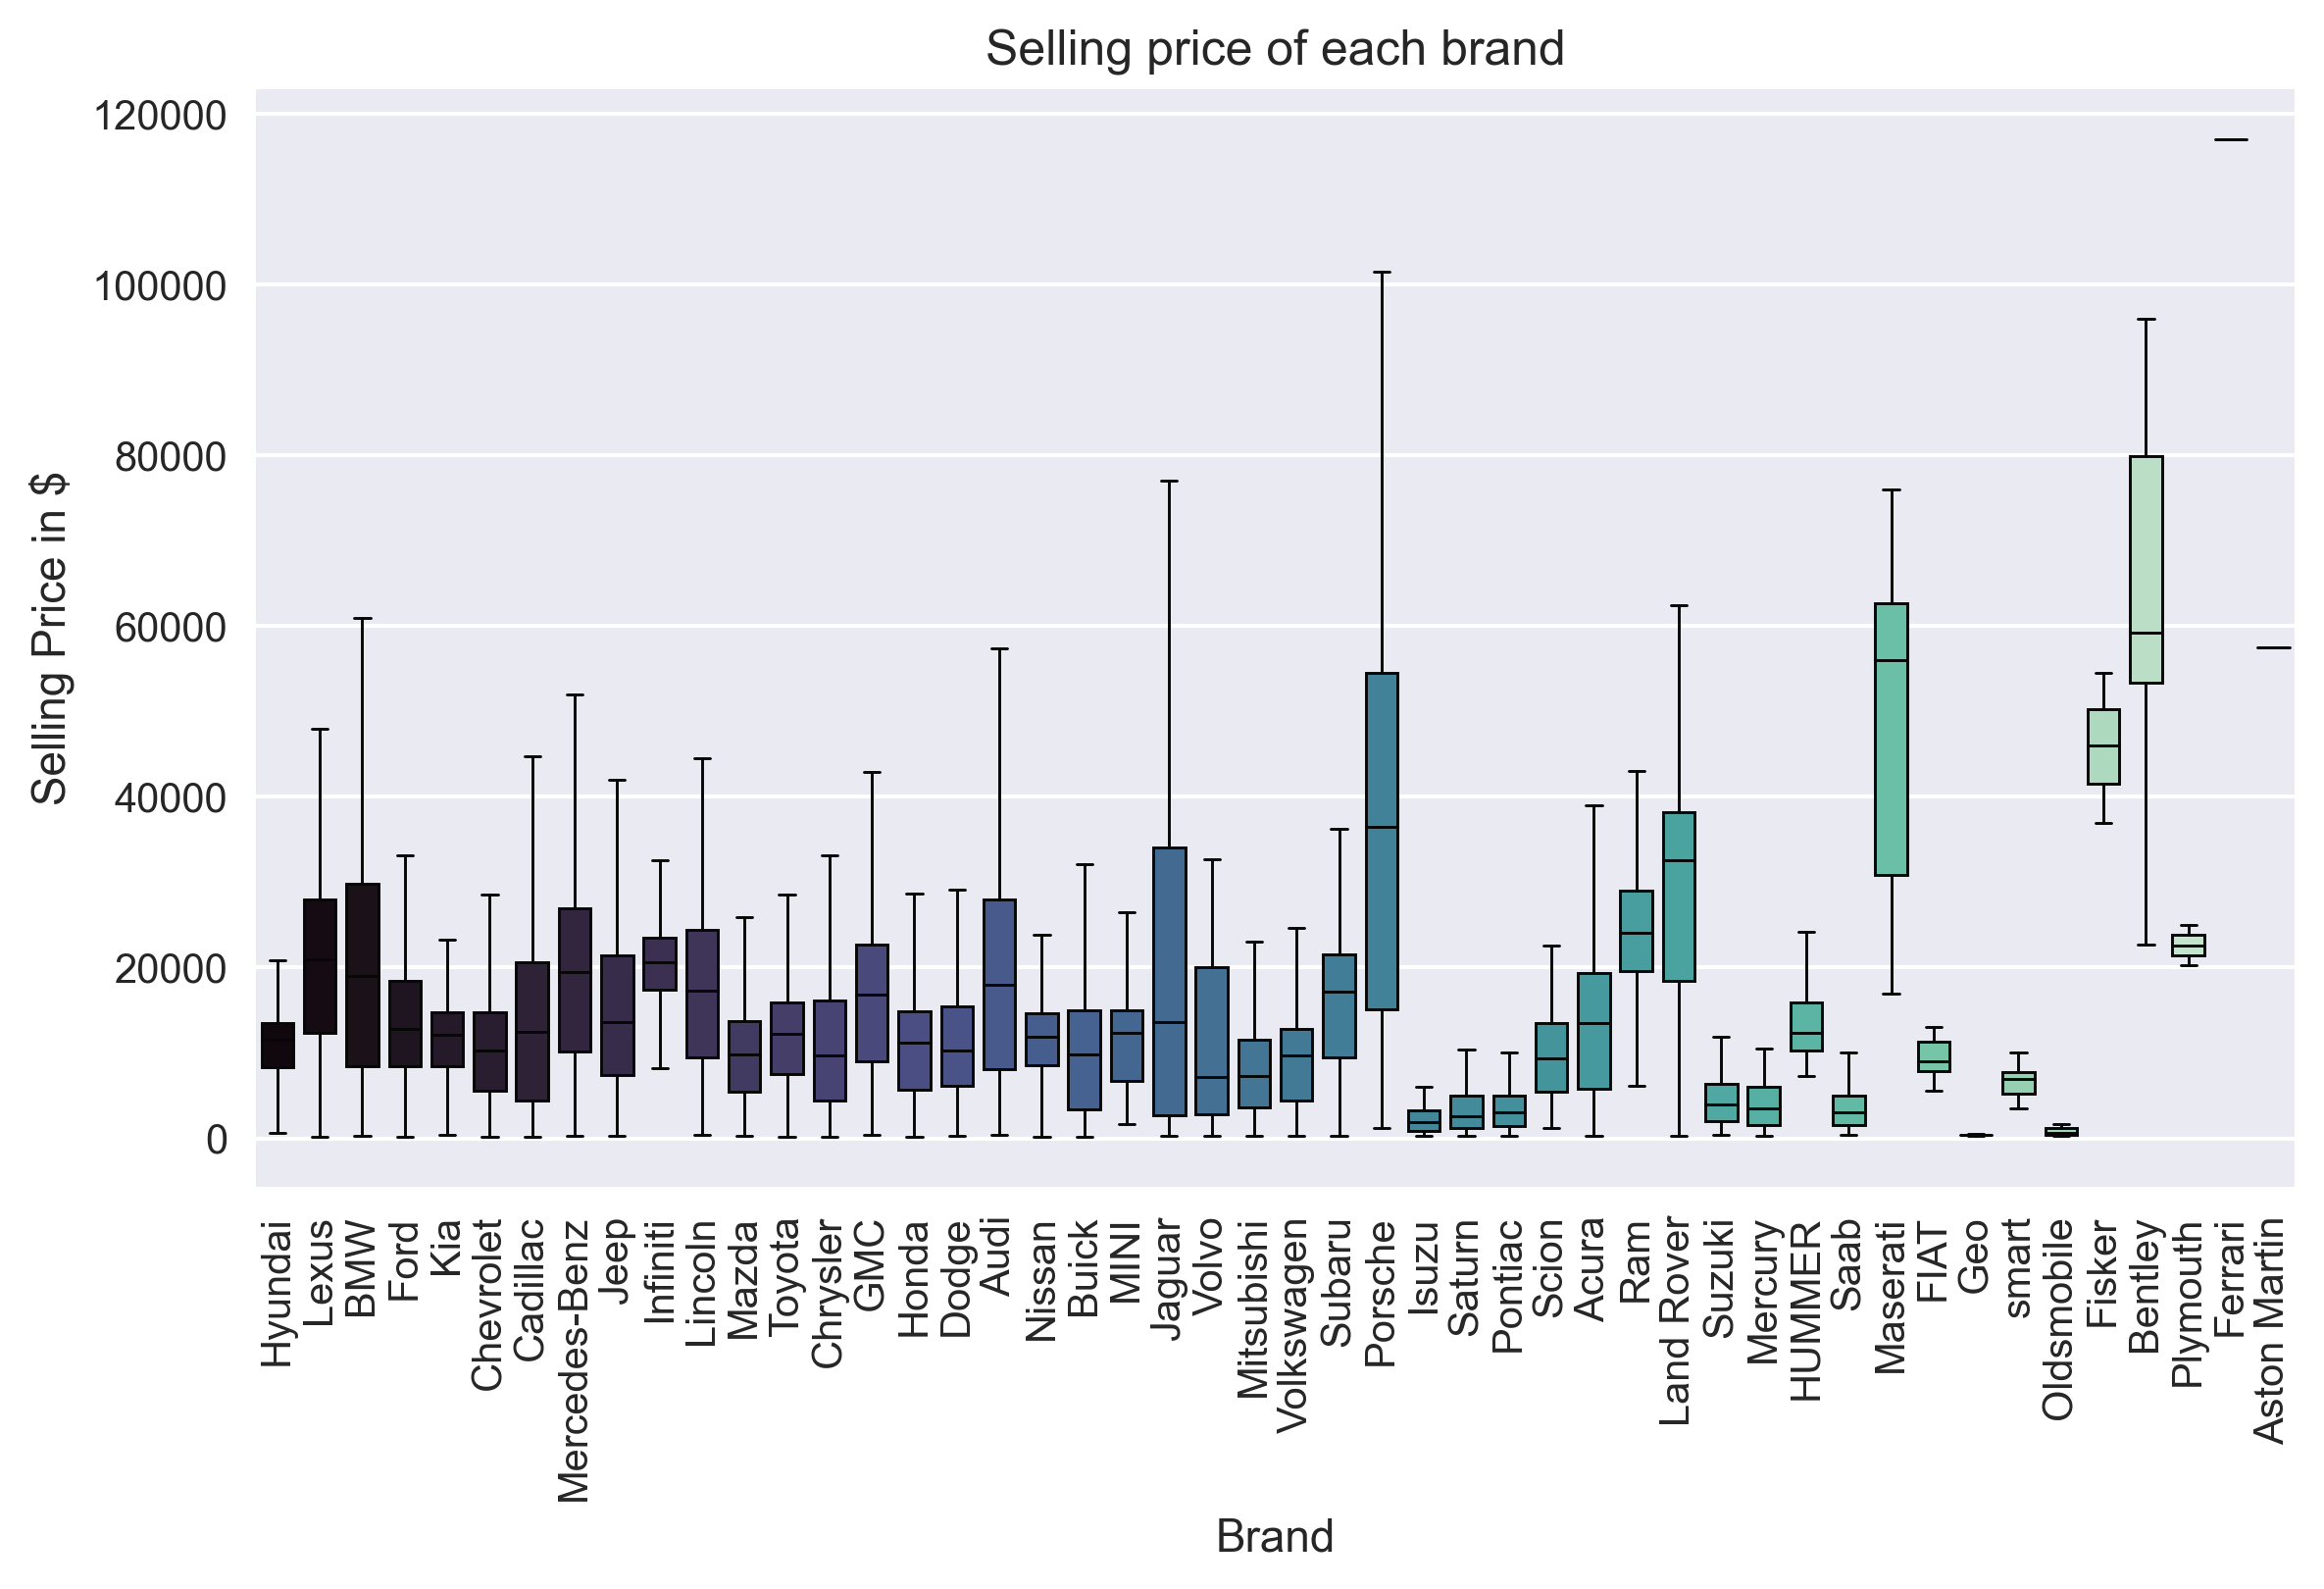

In [207]:
# price_grouped=df.groupby(df['make'])['sellingprice'].aggregate(np.average).reset_index().sort_values('sellingprice',ascending=False)
sns.boxplot(x='make',y='sellingprice',data=df,palette='mako',linewidth=0.7,showfliers=False,width=0.75,
).set(title='Selling price of each brand',ylabel='Selling Price in $',xlabel='Brand')
plt.xticks(rotation=90)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.tight_layout()

**Answer for Q3**: Your answer here

The car brands that have the widest distributions are Porshe, Masserati and Jaguar / Bentley. And the cars that are the most expensive are Porshe and Bentley

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

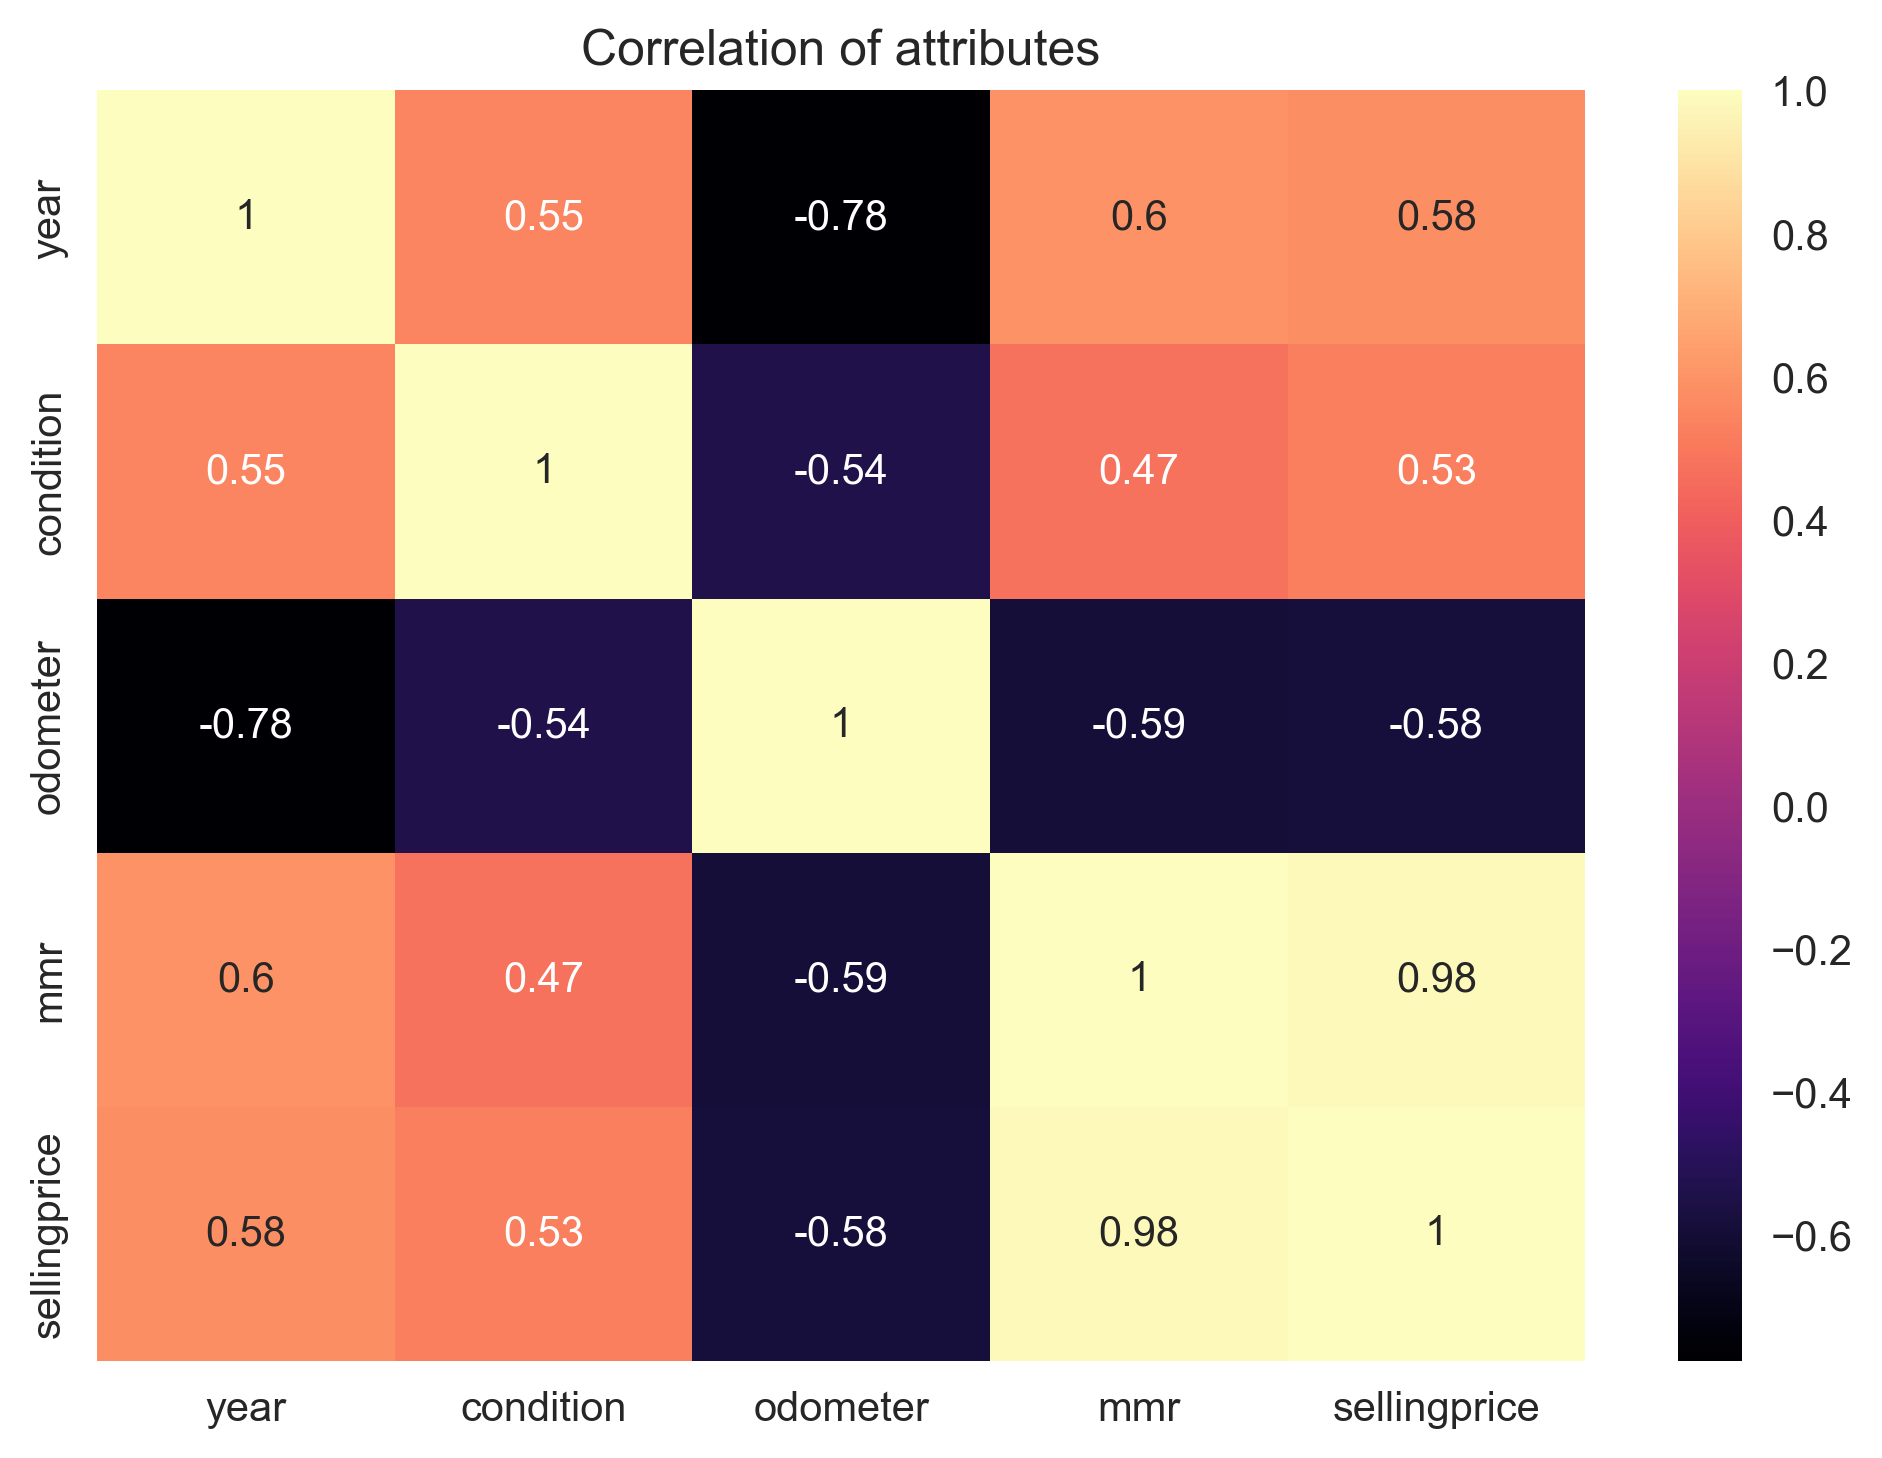

In [208]:
sns.heatmap(df.corr(),annot=True, cmap="magma").set(title='Correlation of attributes')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

Here we can see all the correlations between the different columns, but let's focus on the condition, sellingprice and odometer further

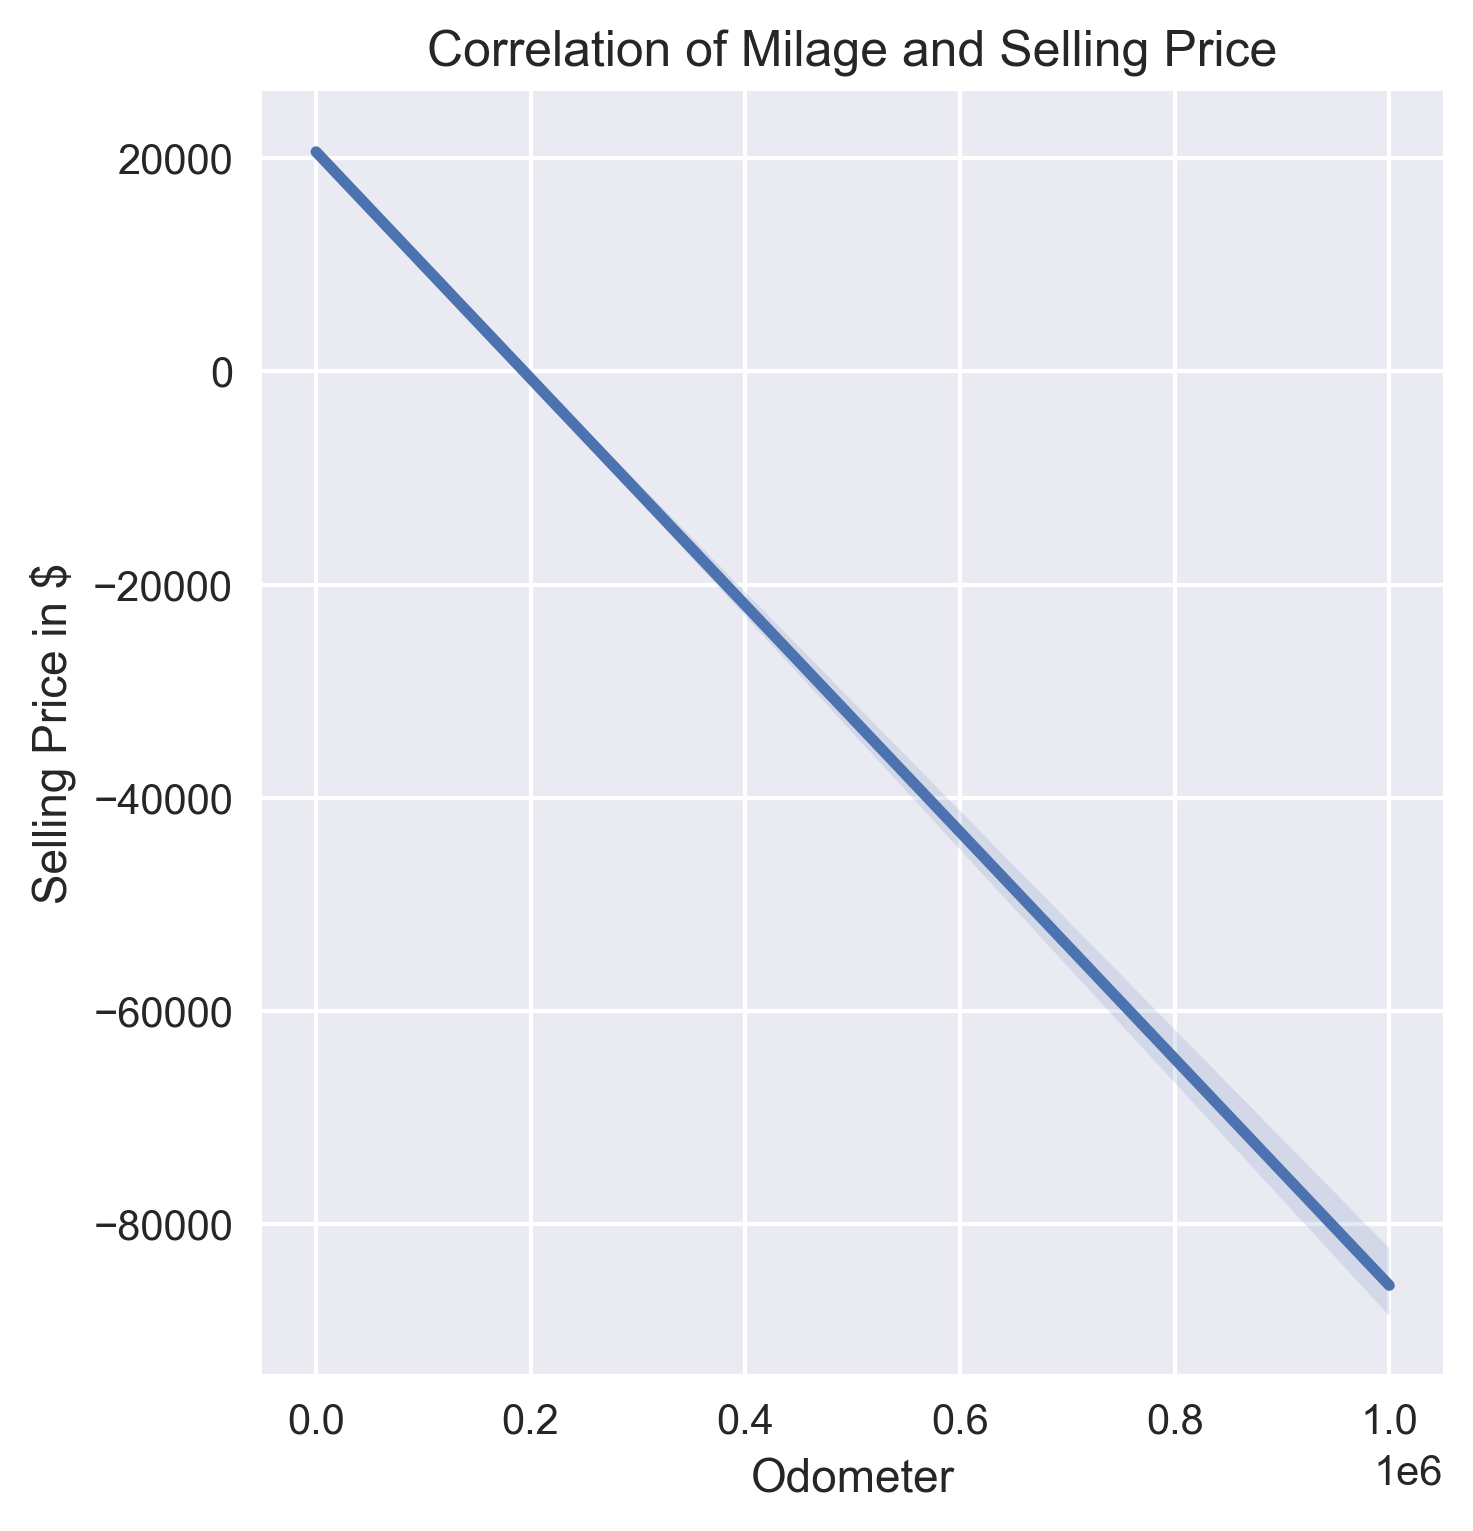

In [209]:
sns.lmplot(x='odometer',y='sellingprice',data=df,scatter=False,height=5).set(title='Correlation of Milage and Selling Price'
,xlabel='Odometer',ylabel='Selling Price in $')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

**Answer for Q4**: Your answer here

The odometer and selling price are negatively correlated (-0.58), so when the odometer increases the selling price decreases. In other words the more milage a car has, the lower its' selling price is

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

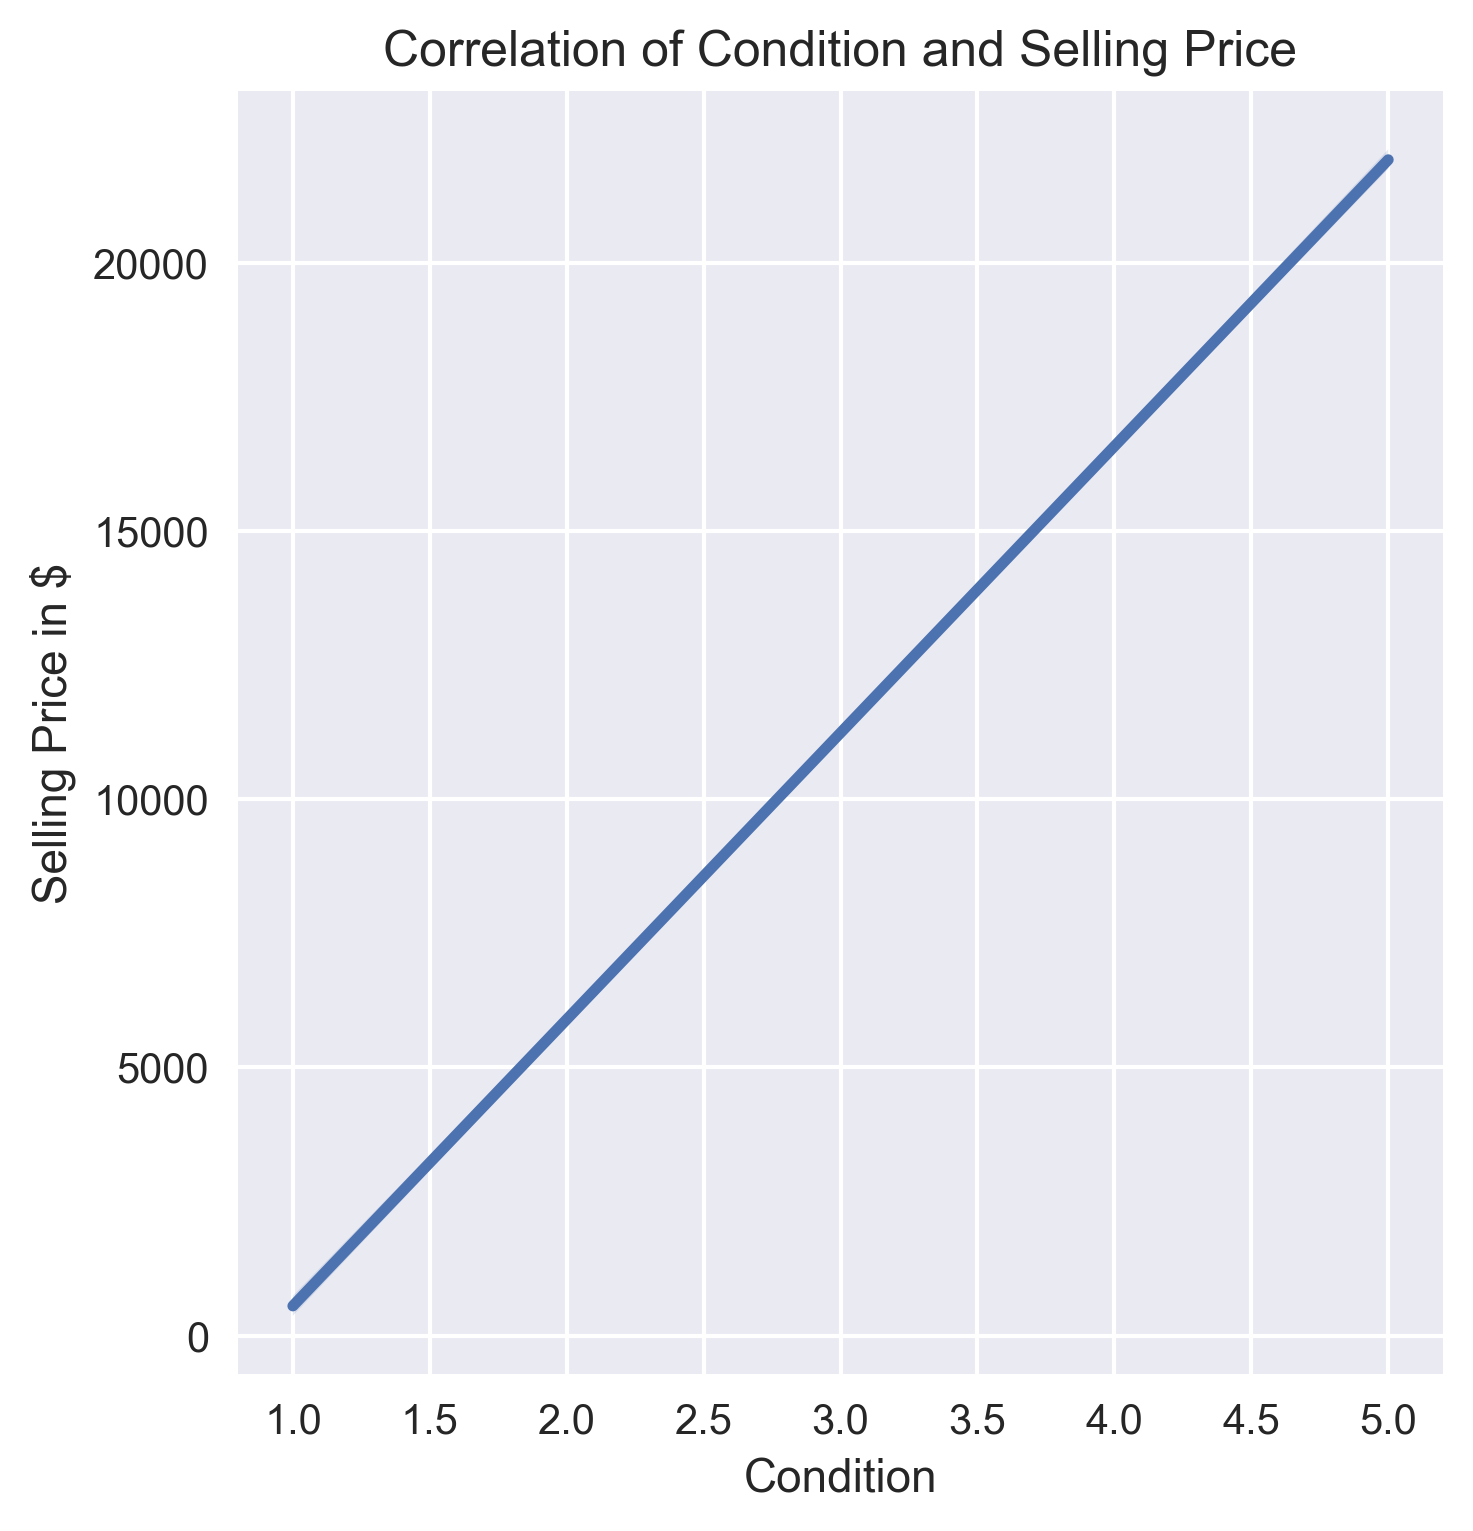

In [210]:
sns.lmplot(x='condition',y='sellingprice',data=df,scatter=False,height=5).set(title='Correlation of Condition and Selling Price'
,xlabel='Condition',ylabel='Selling Price in $')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

**Answer for Q5**: Your answer here

The correlation between the condition and selling Price is positevly correlated (0.53), which means that as the condition gets better the selling Price gets better and vice versa

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

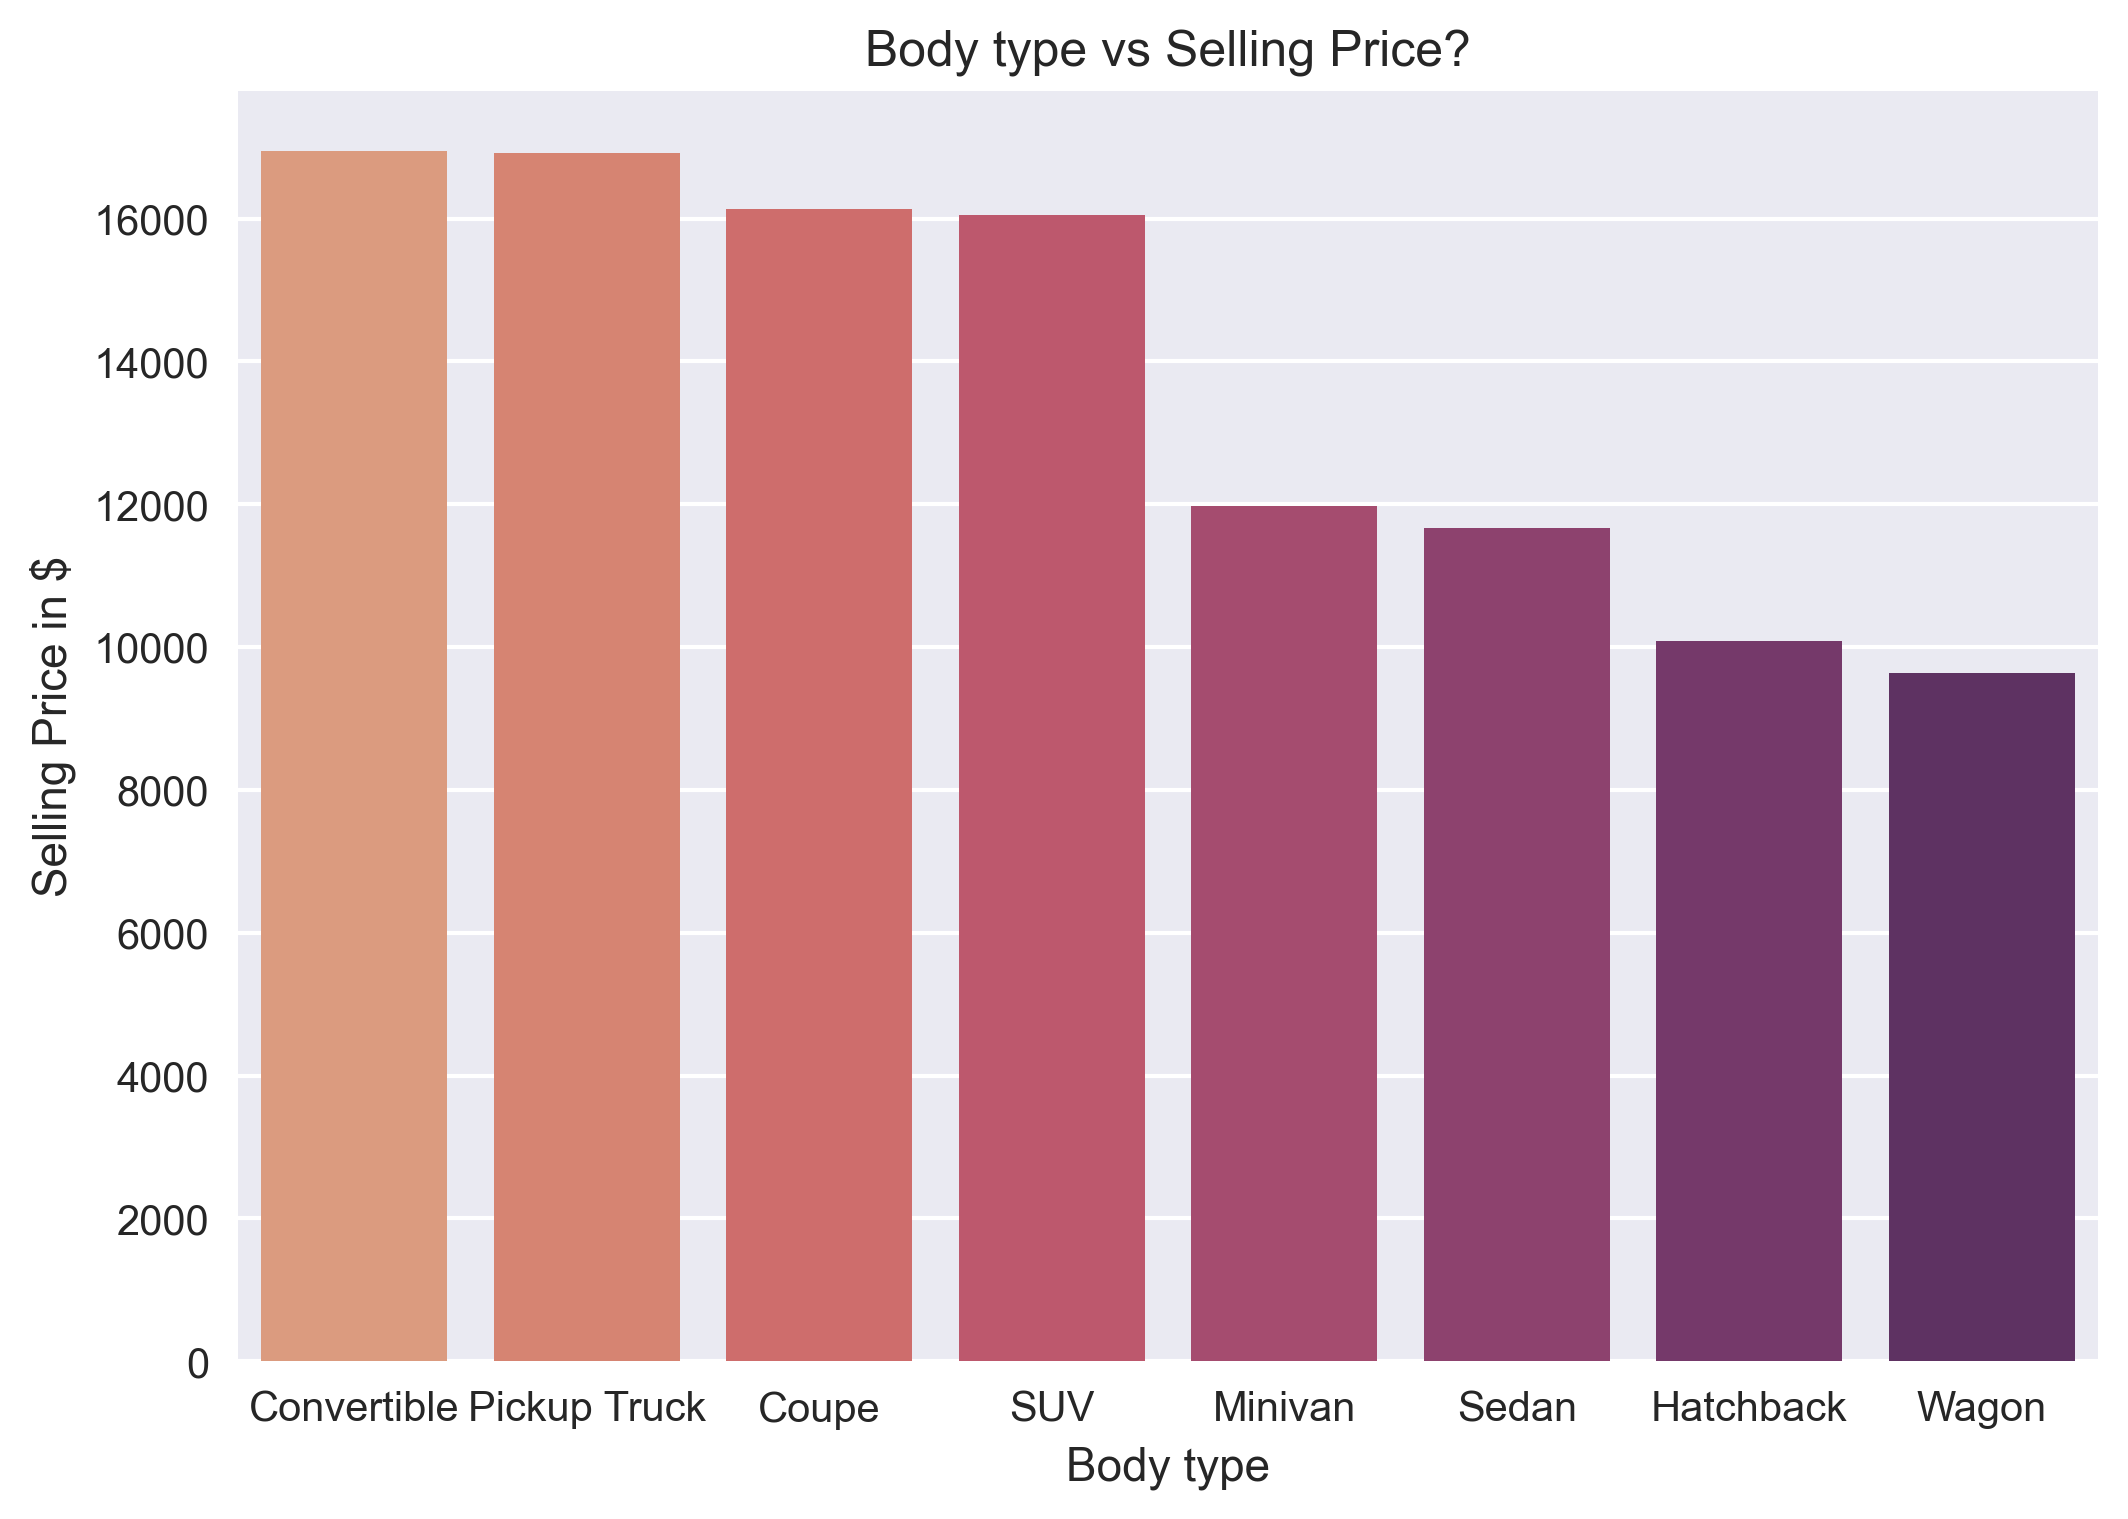

In [211]:
price_grouped=df.groupby(df['body'])['sellingprice'].aggregate(np.average).reset_index().sort_values('sellingprice',ascending=False)
sns.barplot(x='body',y='sellingprice',palette='flare',data=df,ci=False,order=price_grouped['body']).set(title
='Body type vs Selling Price?',xlabel='Body type',ylabel='Selling Price in $')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

**Answer for Q6**: Your answer here

Yes there is a difference in the average price, Convertible and Pickup trucks are the two most expensive body types followed by Coupe and SUV
the least expensive car is the wagon and the most expensive one is the convertible 

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

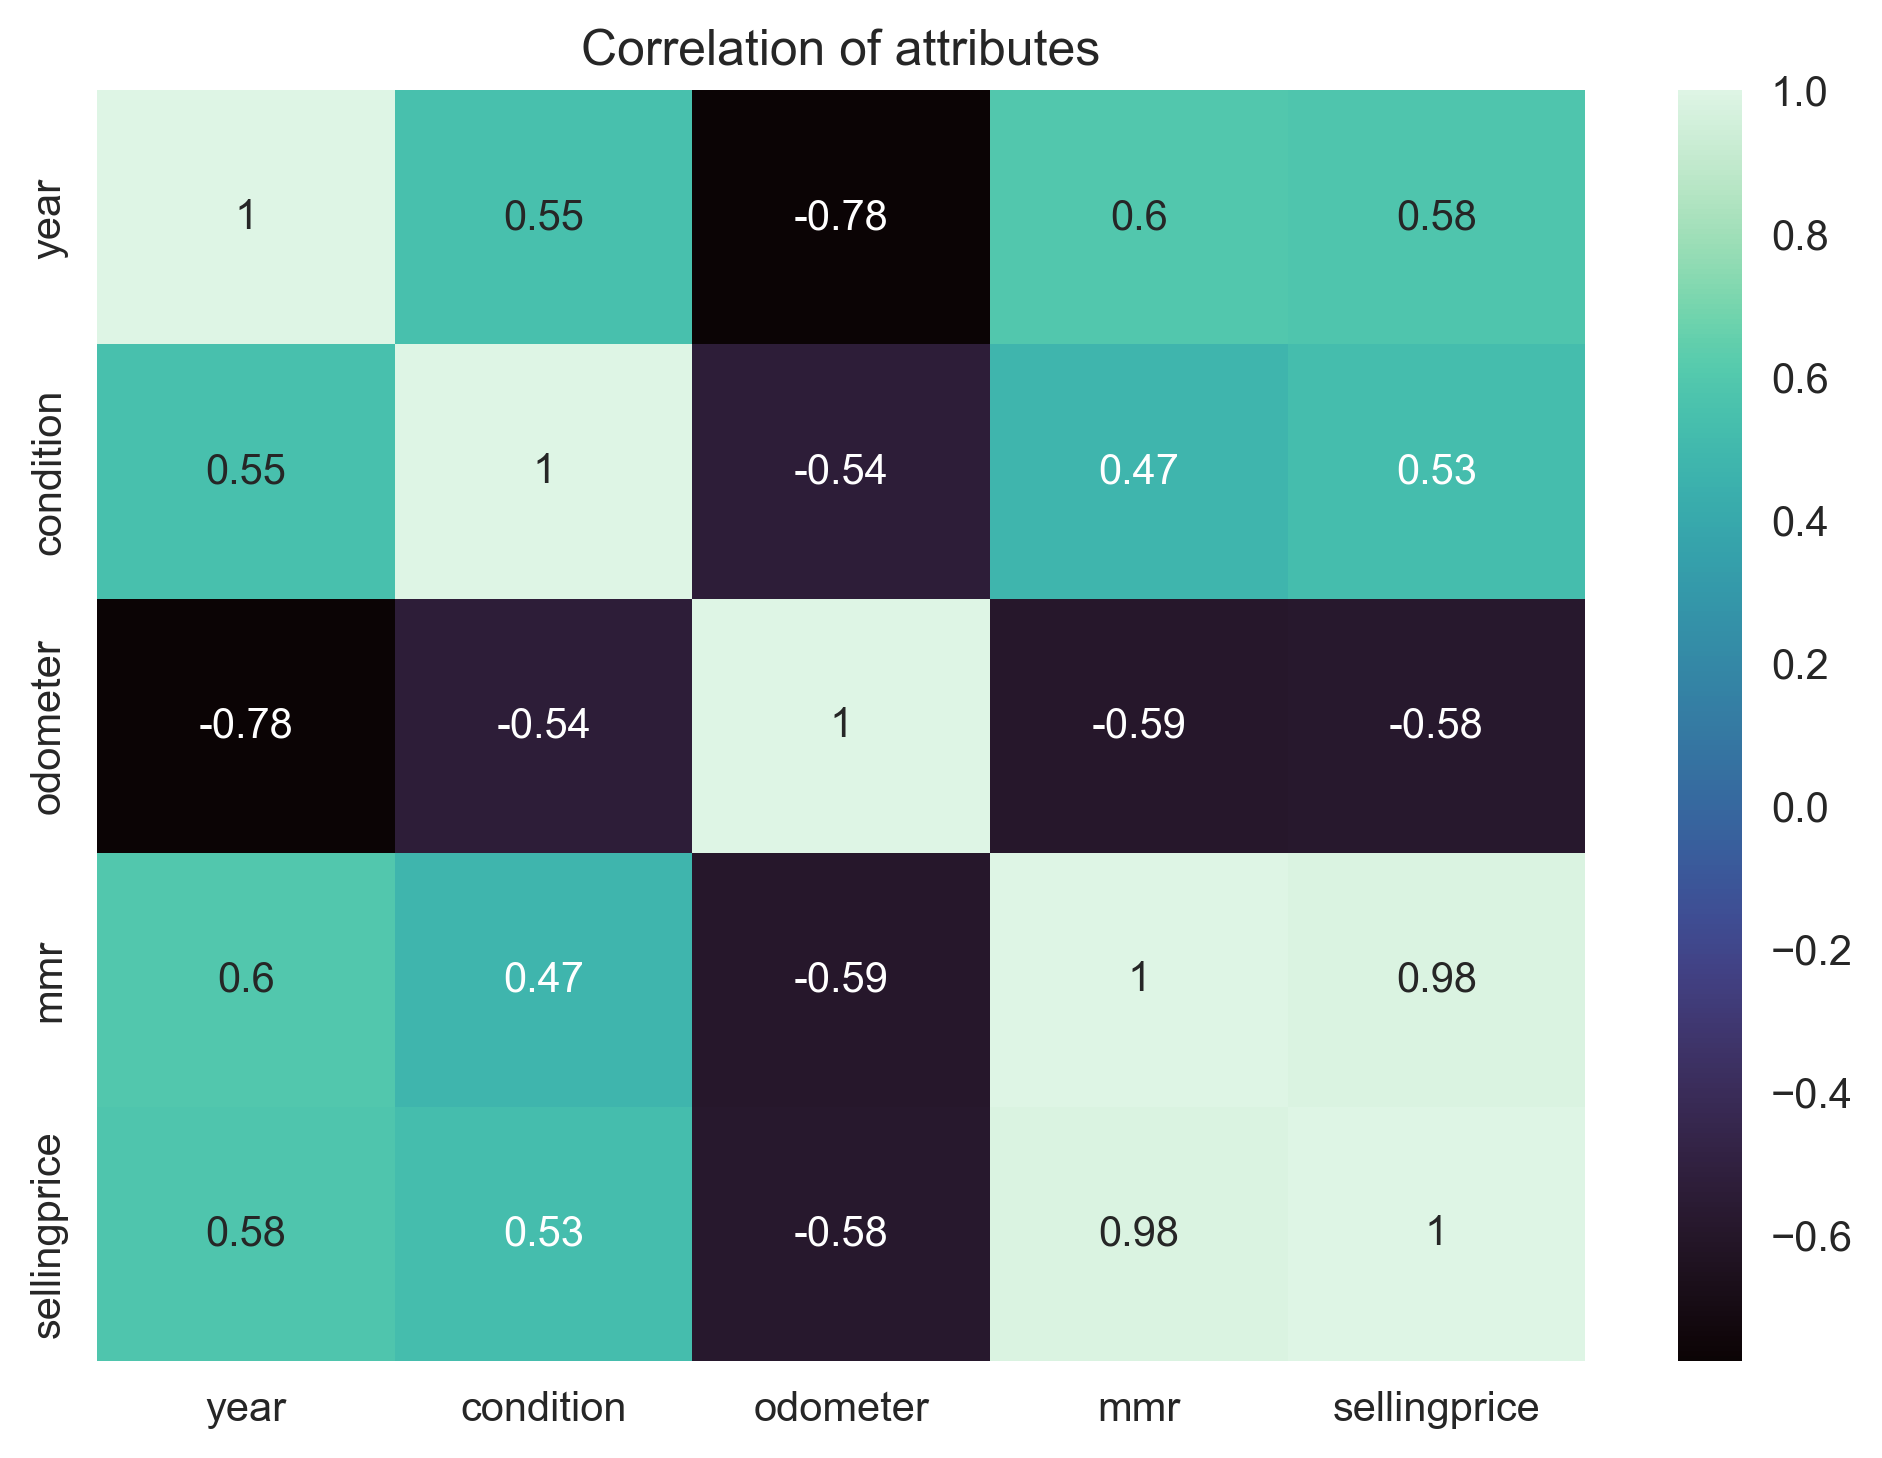

In [212]:
sns.heatmap(df.corr(),annot=True, cmap="mako").set(title='Correlation of attributes')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

For our modeling we'll only be using the important variables/columns to be used in our model. From the heatmap above we can see the correlation between mmr, year, condition and odometer with sellingprice.
we'll be removing some of the columns that we don't need next.
These columns do not directly affect the selling Price of the cars, unlike important columns such as the condition or milage as we observed in the questions before

In [213]:
# remove unwanted columns from the table
df.drop('vin', axis=1, inplace=True)
df.drop('seller', axis=1, inplace=True)
df.drop('state', axis=1, inplace=True)
df.drop('trim', axis=1, inplace=True)
df.drop('model', axis=1, inplace=True)
df.drop('saledate', axis=1, inplace=True)
df.drop('color', axis=1, inplace=True)
df.drop('interior', axis=1, inplace=True)
df.drop('mmr', axis=1, inplace=True)
df.head()

year     make     body transmission  condition  odometer  sellingprice
0  2013  Hyundai    Sedan    automatic        3.9   50404.0         10900
2  2012    Lexus    Sedan    automatic        4.1   21122.0         24200
3  2002      BMW      SUV    automatic        1.9  145303.0          3200
4  2014     Ford  Minivan    automatic        4.9    6714.0         22100
5  2014      Kia    Sedan    automatic        4.6    8386.0         15500

In [214]:
from sklearn import preprocessing
# One-hot encoding is a representation of categorical variable as binary vectors, where qualitative values are divided into mutually exclusive categories
categorical_columns=['transmission','body']
df_encode=pd.get_dummies(data=df,columns=categorical_columns,drop_first=True,dtype='int8')
# Label encoding refers to transforming the word labels into numerical form
label_encoder = preprocessing.LabelEncoder()
df_encode['make']=label_encoder.fit_transform(df_encode['make'])
df_encode.sample(5)

year  make  condition  odometer  sellingprice  transmission_manual  \
7142   2007    44        2.6   94186.0         15900                    0   
45985  2008     7        1.9  117478.0          3000                    0   
21357  2007    40        1.9   91896.0          2800                    0   
14445  2000    22        2.7  193965.0           550                    0   
8659   2013     7        4.3   36556.0         33600                    0   

       body_Coupe  body_Hatchback  body_Minivan  body_Pickup Truck  body_SUV  \
7142            0               0             0                  0         1   
45985           0               0             0                  0         0   
21357           0               0             0                  0         1   
14445           0               0             0                  0         1   
8659            0               0             0                  1         0   

       body_Sedan  body_Wagon  
7142            0           0  
45985           1           0  
21357           0           0  
14445           0           0  
8659            0           0

We transformed the columns transmission and body with the one-hot encoding method, because this method divides qualitative values into mutually exclusive categories. This makes sense with these two columns since transmission only has 2 unique values (automatic and manual) and body has 8, whereas 'make' for example has 48 in which case the one-hot encoding won't work as it will create 48 columns. Here we use the other encoding method called label encoding where each unique value gets a number making the column numerical but categorized with numbers.

In [215]:
# Transform the year column to age column
column=2022-df_encode['year'].values
df_encode.insert(0,'age',column)
df_encode.drop('year', axis=1, inplace=True)
df_encode.head()

age  make  condition  odometer  sellingprice  transmission_manual  \
0    9    18        3.9   50404.0         10900                    0   
2   10    25        4.1   21122.0         24200                    0   
3   20     3        1.9  145303.0          3200                    0   
4    8    13        4.9    6714.0         22100                    0   
5    8    23        4.6    8386.0         15500                    0   

   body_Coupe  body_Hatchback  body_Minivan  body_Pickup Truck  body_SUV  \
0           0               0             0                  0         0   
2           0               0             0                  0         0   
3           0               0             0                  0         1   
4           0               0             1                  0         0   
5           0               0             0                  0         0   

   body_Sedan  body_Wagon  
0           1           0  
2           1           0  
3           0           0  
4           0           0  
5           1           0

In [216]:
# Min-Max Normalization
numerical_columns = ['age','condition','odometer','sellingprice']
df_encode[numerical_columns] = ( 
    df_encode[numerical_columns] - df_encode[numerical_columns].min()  
) /( 
    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)
df_encode.head()

age  make  condition  odometer  sellingprice  transmission_manual  \
0  0.08    18      0.725  0.050403      0.046770                    0   
2  0.12    25      0.775  0.021121      0.104633                    0   
3  0.52     3      0.225  0.145302      0.013270                    0   
4  0.04    13      0.975  0.006713      0.095497                    0   
5  0.04    23      0.900  0.008385      0.066783                    0   

   body_Coupe  body_Hatchback  body_Minivan  body_Pickup Truck  body_SUV  \
0           0               0             0                  0         0   
2           0               0             0                  0         0   
3           0               0             0                  0         1   
4           0               0             1                  0         0   
5           0               0             0                  0         0   

   body_Sedan  body_Wagon  
0           1           0  
2           1           0  
3           0           0  
4           0           0  
5           1           0

## Modelling

_Apply the linear regression model below._

In [217]:
# test to get the best random state 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = df_encode.drop('sellingprice',axis=1) # Independent variables - remove the dependant variable
y = df_encode['sellingprice'] # Dependent variable
random_states = np.arange(start=0, stop=100)
scores=[]
lin_reg = LinearRegression()
for state in random_states:
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=state)
    lin_reg.fit(x_train, y_train)
    R_square = lin_reg.score(x_test,y_test)
    t='Best R^2 obtained is:'+str(R_square)+' RS='+str(state)
    scores.append(t)    
print(max(scores))

Best R^2 obtained is:0.5448289210594739 RS=76


In [218]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x = df_encode.drop('sellingprice',axis=1) # Independent variables - remove the dependant variable
y = df_encode['sellingprice'] # Dependent variable
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=76)
print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 33853
Testing dataset size: 8464


In [219]:
# Training the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

parameter               column  theta_value
0    theta_0          y-intersect     0.085340
1    theta_1                  age    -0.075340
2    theta_2                 make    -0.000049
3    theta_3            condition     0.037727
4    theta_4             odometer    -0.224746
5    theta_5  transmission_manual    -0.001925
6    theta_6           body_Coupe    -0.003481
7    theta_7       body_Hatchback    -0.040954
8    theta_8         body_Minivan    -0.023527
9    theta_9    body_Pickup Truck     0.003312
10  theta_10             body_SUV    -0.007516
11  theta_11           body_Sedan    -0.028152
12  theta_12           body_Wagon    -0.031770

## Model Evaluation

_Evaluate the model you applied._

In [220]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  0.026371850419183142
R^2 obtained is: 0.5448289210594739


## Model Validation

_Check if the model you applied meets the necessary assumptions for the chosen model._

Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual error')

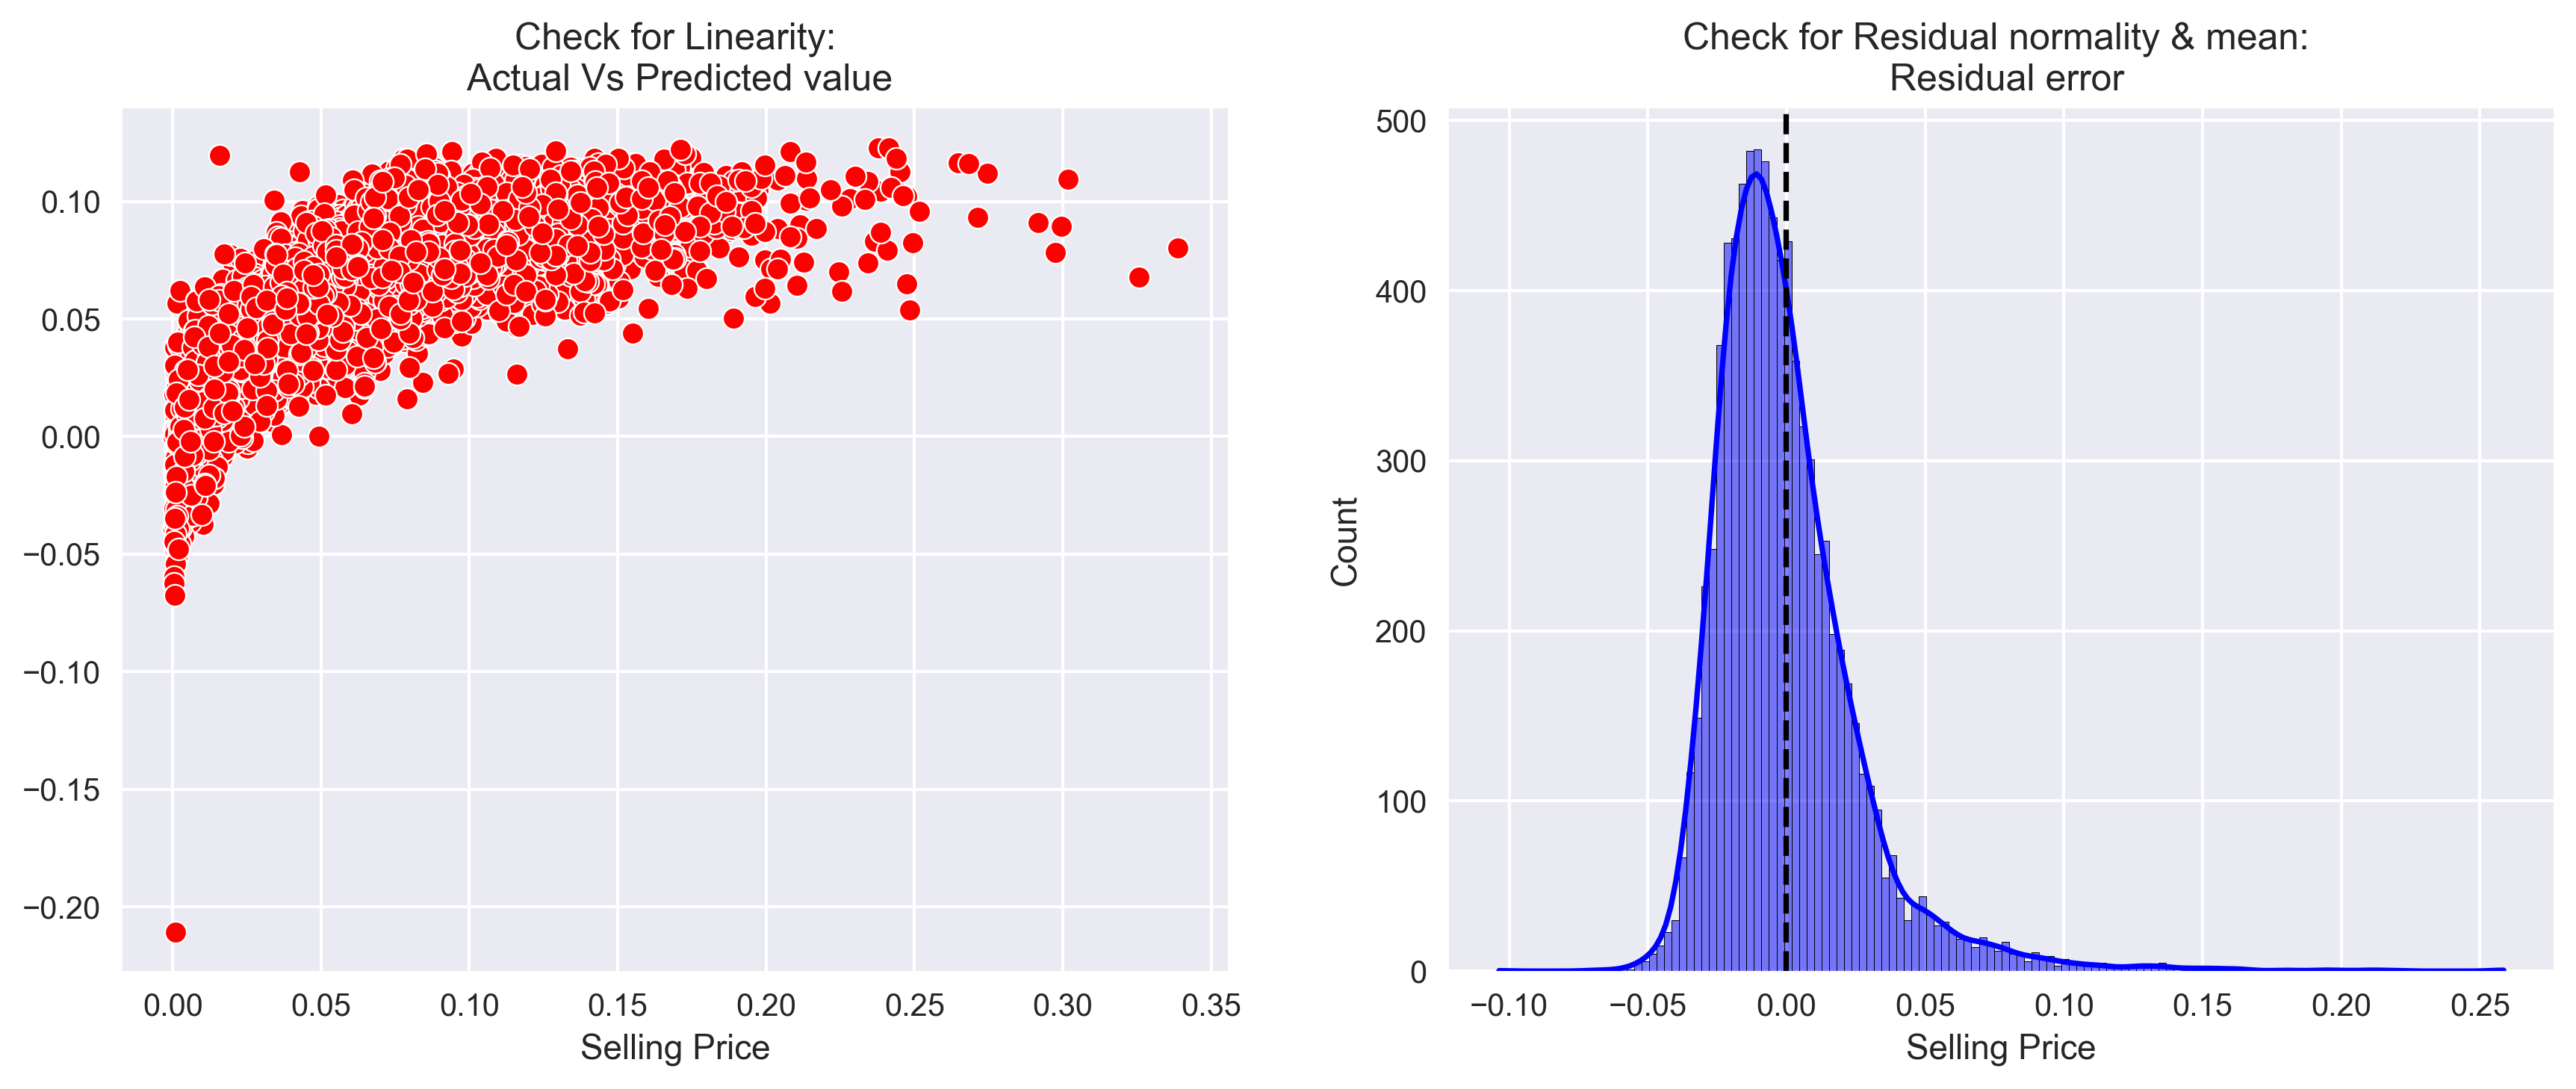

In [221]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r').set(xlabel='Selling Price')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True).set(xlabel='Selling Price')
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error')

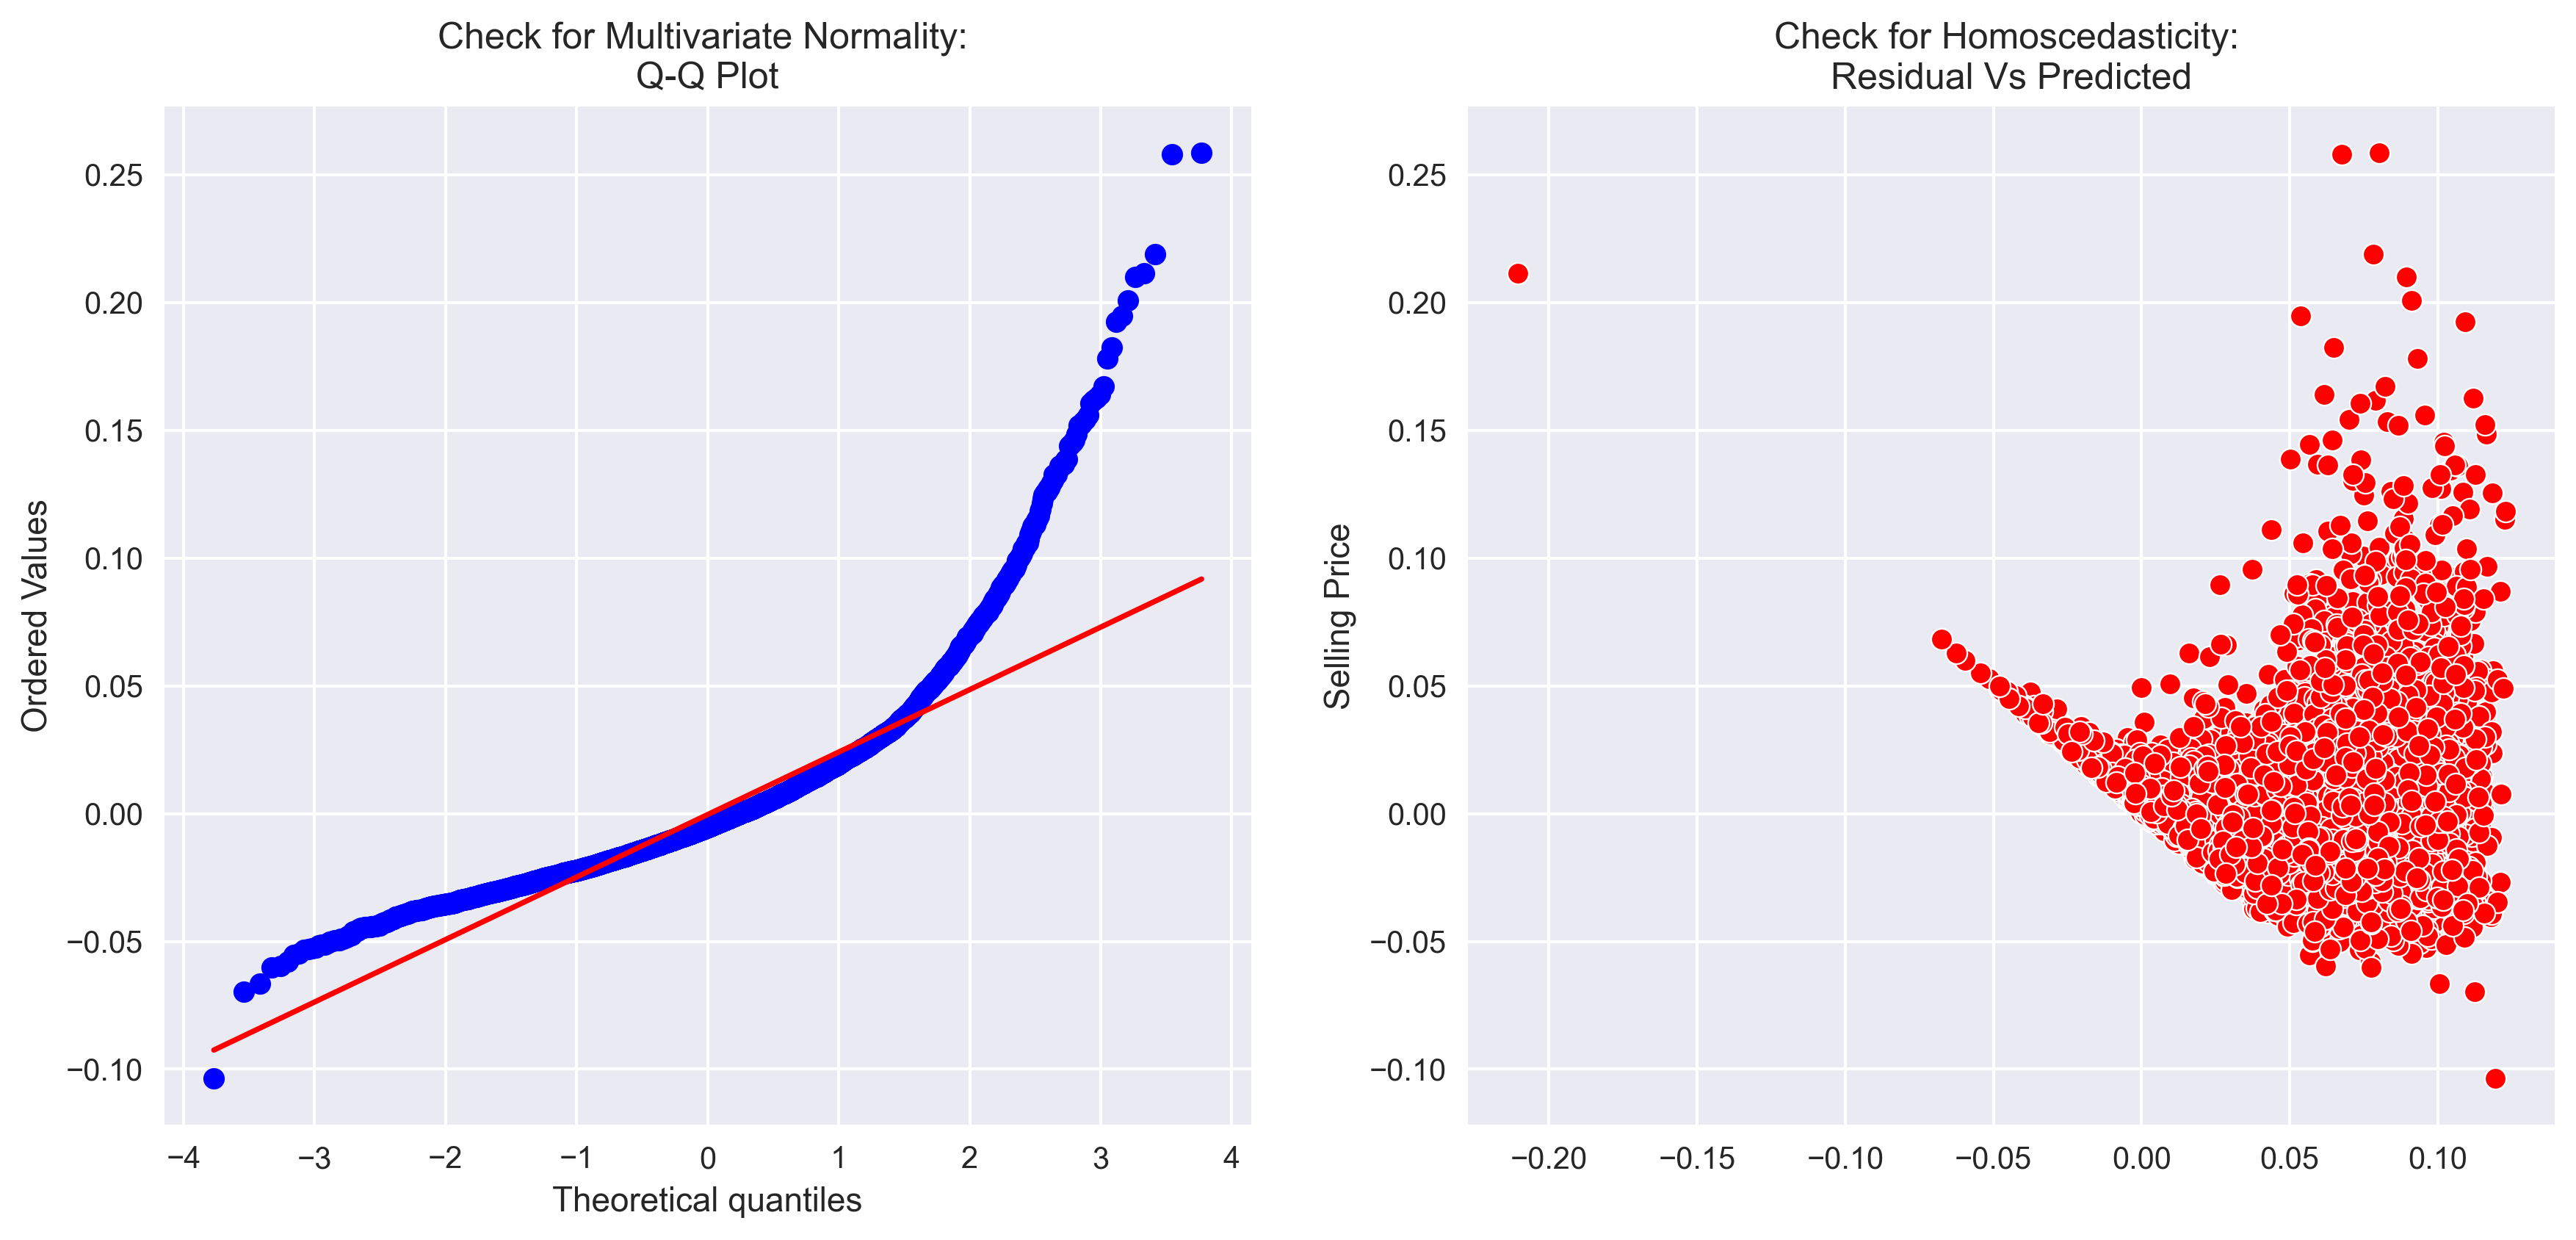

In [222]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')
ax[1].set_ylabel('Selling Price')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [223]:
# Check for Multicollinearity
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_data = pd.DataFrame()
VIF_data['feature'] = x.columns 
VIF_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
VIF_data

feature       VIF
0                   age  6.745576
1                  make  3.417327
2             condition  8.548775
3              odometer  7.280516
4   transmission_manual  1.099425
5            body_Coupe  1.570717
6        body_Hatchback  1.626261
7          body_Minivan  1.826136
8     body_Pickup Truck  2.125824
9              body_SUV  5.321432
10           body_Sedan  7.741441
11           body_Wagon  1.496703

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.

## Model Accuracy

In order to validate this model we need check a couple assumptions of linear regression models and check if we met those
1. Is the relationship between the dependant and independant variables linear ?
    To check that, we plotted a scatterplot with the actual values against the predicted values (graph on the left), and the result was a not linear scatterplot, which means that the relationship between the dependant and independant variable is also not linear
2. The residual error plot(graph on the right) should be normally distributed
    It wasn't normally distrubuted and it had a right skew
3. The mean of residual error should be 0 or close to 0.
    The residual mean is not zero, it's a bit close tho 
4. Multivariate normal ?
    The Q-Q plot, or quantile-quantile plot shows a normal distribution but with "heavy tails". The graph curves off in the extremities. This means that the data has more extreme values than would be expected, we could classify them as "outliers"
5. The data is not homoscedastic
    There is a very clear view of heteroscedasticity, which is the exact opposite of homoscedasticity. We observe that with the cone-shape of the scatterplot. This is not particularly good,because errors will increase after a certain point.
6. Data must not have multicollinearity
    To check that we have conducted a variance inflation factors (VIF) check. The variance inflation factor (VIF) identifies correlation between independent variables and strength of that correlation. all VIFs were below 10 which indictaes not high multicolinearity
Note: the larger the R-squared value, the more precisely the predictor variables are able to predict the value of the response variable.
This model achieved a R^2 value of 0.5448289210594739, which is a not a very high accuracy result


## Suggestions

While the model performed with high accuracy and checked most of the assumptions of linear regression, some issues were present and deflinetly need adjustments.
1. The most obvious and crucial problem are the outliers. Because outliers were present, it made some of the validations hard. For example the 
    Q-Q Plot, was a good example, were the outliers made the change. The Q-Q plot became "heavy tailed", because outliers were present.
2. Another issue that was observed was the homoscedasticity in the scatterplot
    When heteroscedasticity is present in a regression analysis, the results of the analysis become hard to trust
So for future suggestions:
    - More data cleaning is possible to remove outliers and reduce these extremes
    - find a possible way to fix heteroscedasticity by transforming the Dependant Variable

---

## BONUS
---
Since linear regression is sensitive to outliers and their presence can severely degrade the model’s performance,
remove the outliers and train a new linear regression model with the outliers removed. Evaluate and compare the
new model’s performance to your previous model that was trained with outliers present in its training data.

## Data Preparation for Modelling

In [224]:
# Before
df_encode.shape

(42317, 13)

The method below is called the IQR method. The basic assumption is that at least the "middle half" of your data is valid and resembles the distribution well. Here we eliminate all data that is more than 2.22 times the IQR away from the median of the data.
Why 2.22 ? 2.22 is equivilant to a z-score of z=3. A z-score of 3 means that the value is much higher than average. That's why we use 2.22 to eliminate values that are higher than average basically. 

In [225]:
# Remove outliers 
cols = df.select_dtypes('number').columns  # limits to a (float), b (int) and e (timedelta)
df_sub = df.loc[:, cols]
iqr = df_sub.quantile(0.75, numeric_only=False) - df_sub.quantile(0.25, numeric_only=False)
lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22
df.loc[:, cols] = df_sub.where(lim, np.nan)
df.dropna(subset=cols, inplace=True)

from sklearn import preprocessing
# One-hot encoding is a representation of categorical variable as binary vectors, where qualitative values are divided into mutually exclusive categories
categorical_columns=['transmission','body']
df_encode=pd.get_dummies(data=df,columns=categorical_columns,drop_first=True,dtype='int8')
# Label encoding refers to transforming the word labels into numerical form
label_encoder = preprocessing.LabelEncoder()
df_encode['make']=label_encoder.fit_transform(df_encode['make'])
# Transform the year column to age column
column=2022-df_encode['year'].values
df_encode.insert(0,'age',column)
df_encode.drop('year', axis=1, inplace=True)
df_encode.head()

# Min-Max Normalization
numerical_columns = ['age','condition','odometer','sellingprice']
df_encode[numerical_columns] = ( 
    df_encode[numerical_columns] - df_encode[numerical_columns].min()  
) /( 
    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)
df_encode.shape

(39866, 13)

This is another method, which also works, however i decided to just use the first method (the IQR method above)

In [226]:
# # For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
# # anything above a zscore of 3 is not taken 
# from scipy import stats
# df_encode=df_encode[(np.abs(stats.zscore(df_encode)) < 3).all(axis=1)]
# df_encode.shape

## Modelling

_Apply the linear regression model below._

In [227]:
# test to get the best random state 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = df_encode.drop('sellingprice',axis=1) # Independent variables - remove the dependant variable
y = df_encode['sellingprice'] # Dependent variable
random_states = np.arange(start=0, stop=100)
scores=[]
lin_reg = LinearRegression()
for state in random_states:
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=state)
    lin_reg.fit(x_train, y_train)
    R_square = lin_reg.score(x_test,y_test)
    t='Best R^2 obtained is:'+str(R_square)+' RS='+str(state)
    scores.append(t)    
print(max(scores))

Best R^2 obtained is:0.6179255154477059 RS=35


In [228]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x = df_encode.drop('sellingprice',axis=1) # Independent variables - remove the dependant variable
y = df_encode['sellingprice'] # Dependent variable
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=35)
print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 31892
Testing dataset size: 7974


In [229]:
# training the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

parameter               column  theta_value
0    theta_0          y-intersect     0.481279
1    theta_1                  age    -0.241774
2    theta_2                 make    -0.000175
3    theta_3            condition     0.191464
4    theta_4             odometer    -0.341393
5    theta_5  transmission_manual    -0.007091
6    theta_6           body_Coupe    -0.000176
7    theta_7       body_Hatchback    -0.172789
8    theta_8         body_Minivan    -0.058435
9    theta_9    body_Pickup Truck     0.093601
10  theta_10             body_SUV     0.019279
11  theta_11           body_Sedan    -0.101335
12  theta_12           body_Wagon    -0.112270

## Model Evaluation

_Evaluate the model you applied._

In [230]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  0.13033619853118228
R^2 obtained is: 0.6179255154477059


## Model Validation

_Check if the model you applied meets the necessary assumptions for the chosen model._

Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual error')

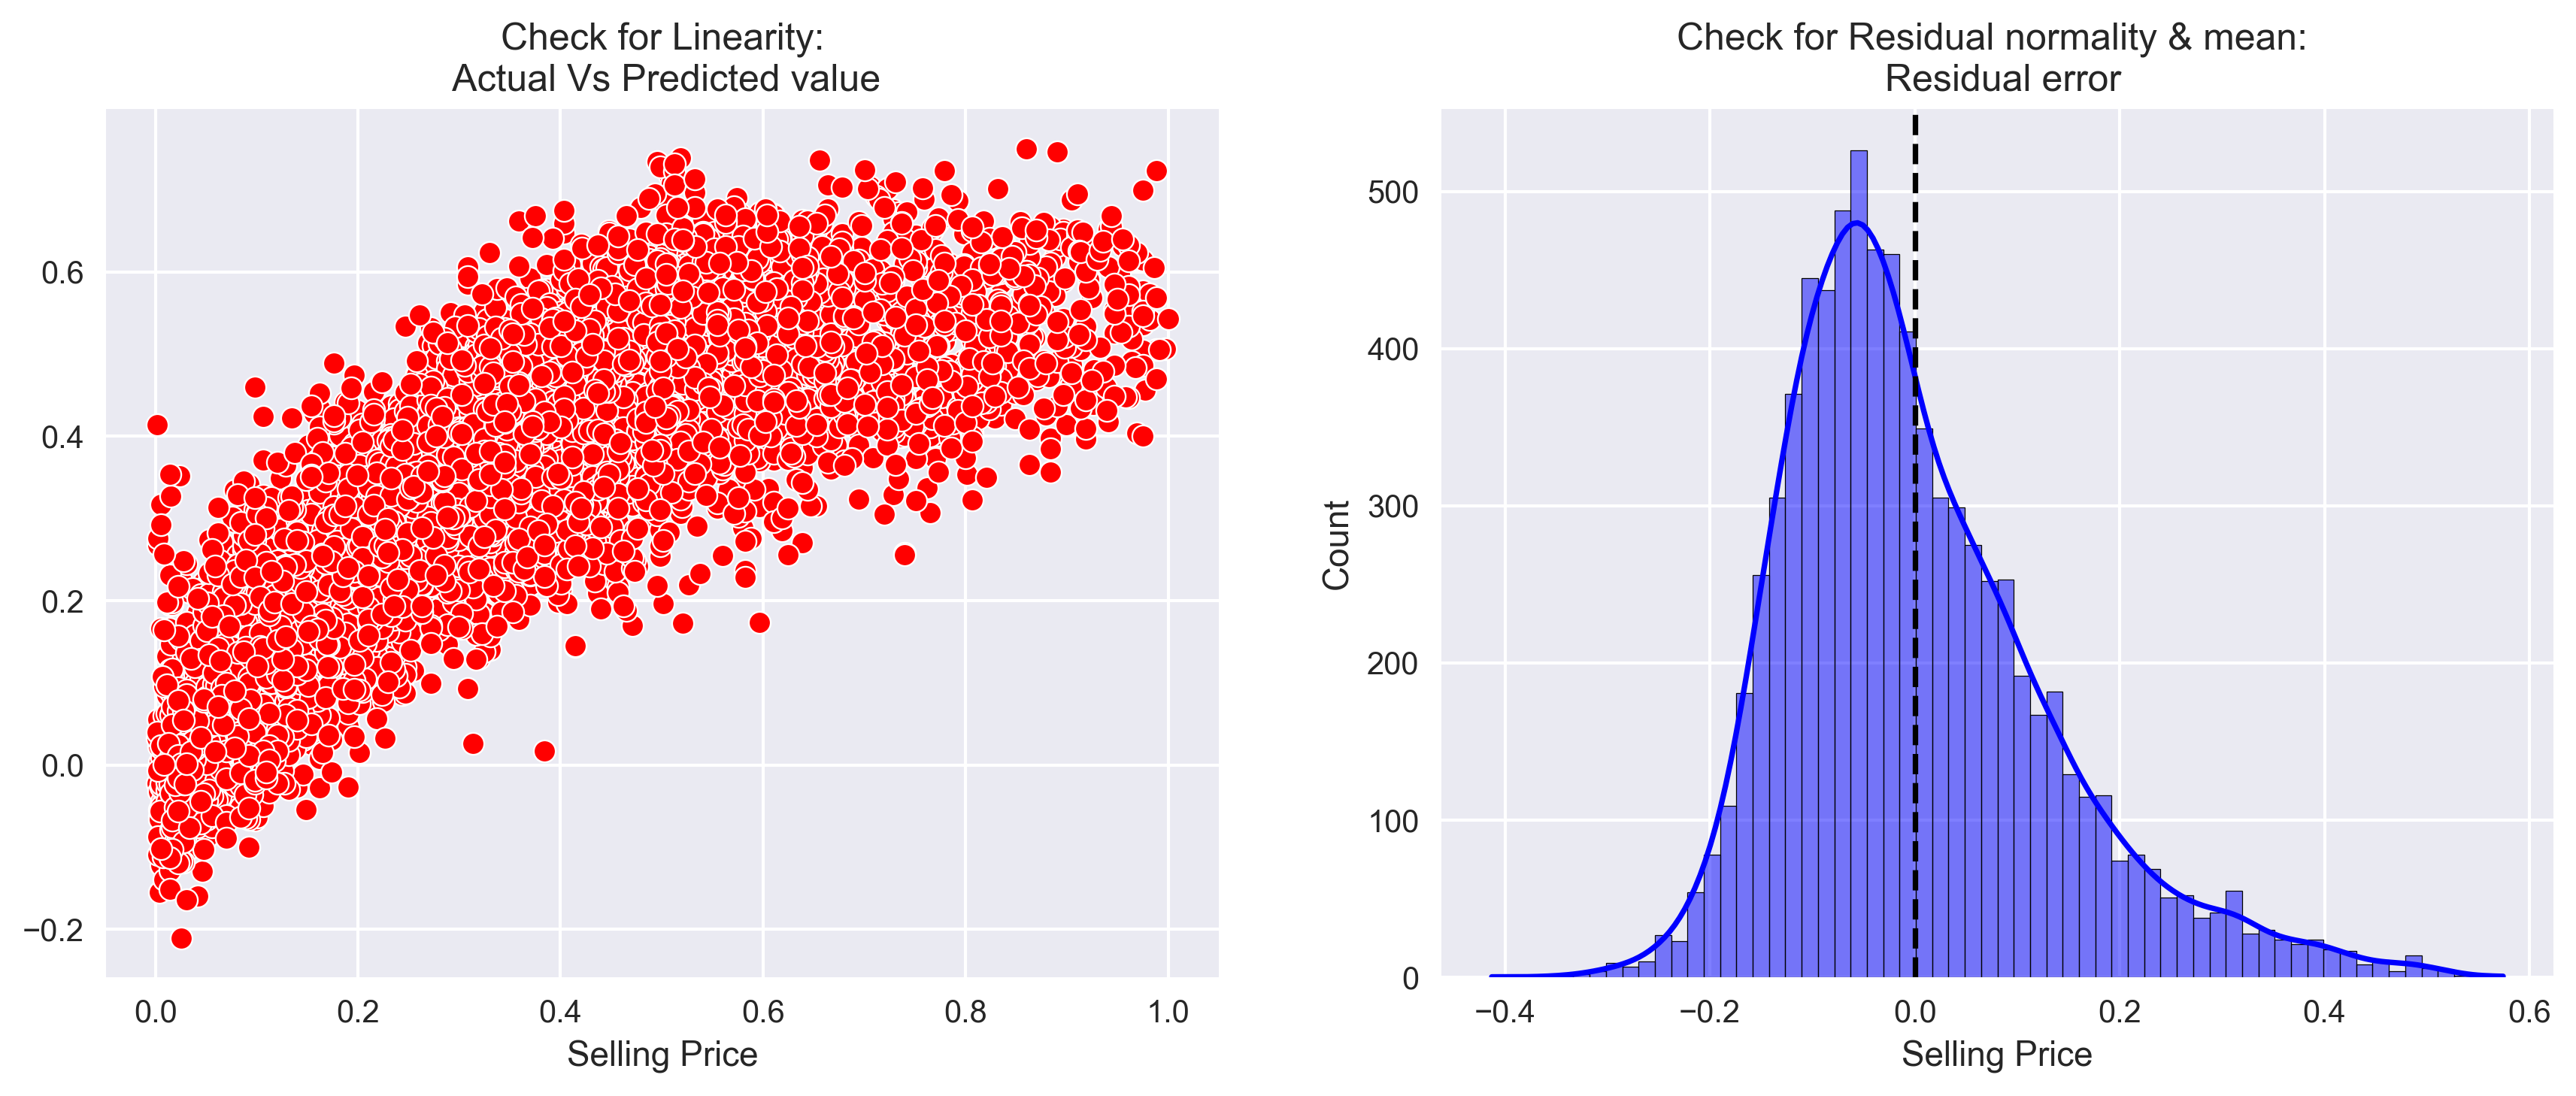

In [231]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r').set(xlabel='Selling Price')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True).set(xlabel='Selling Price')
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error')

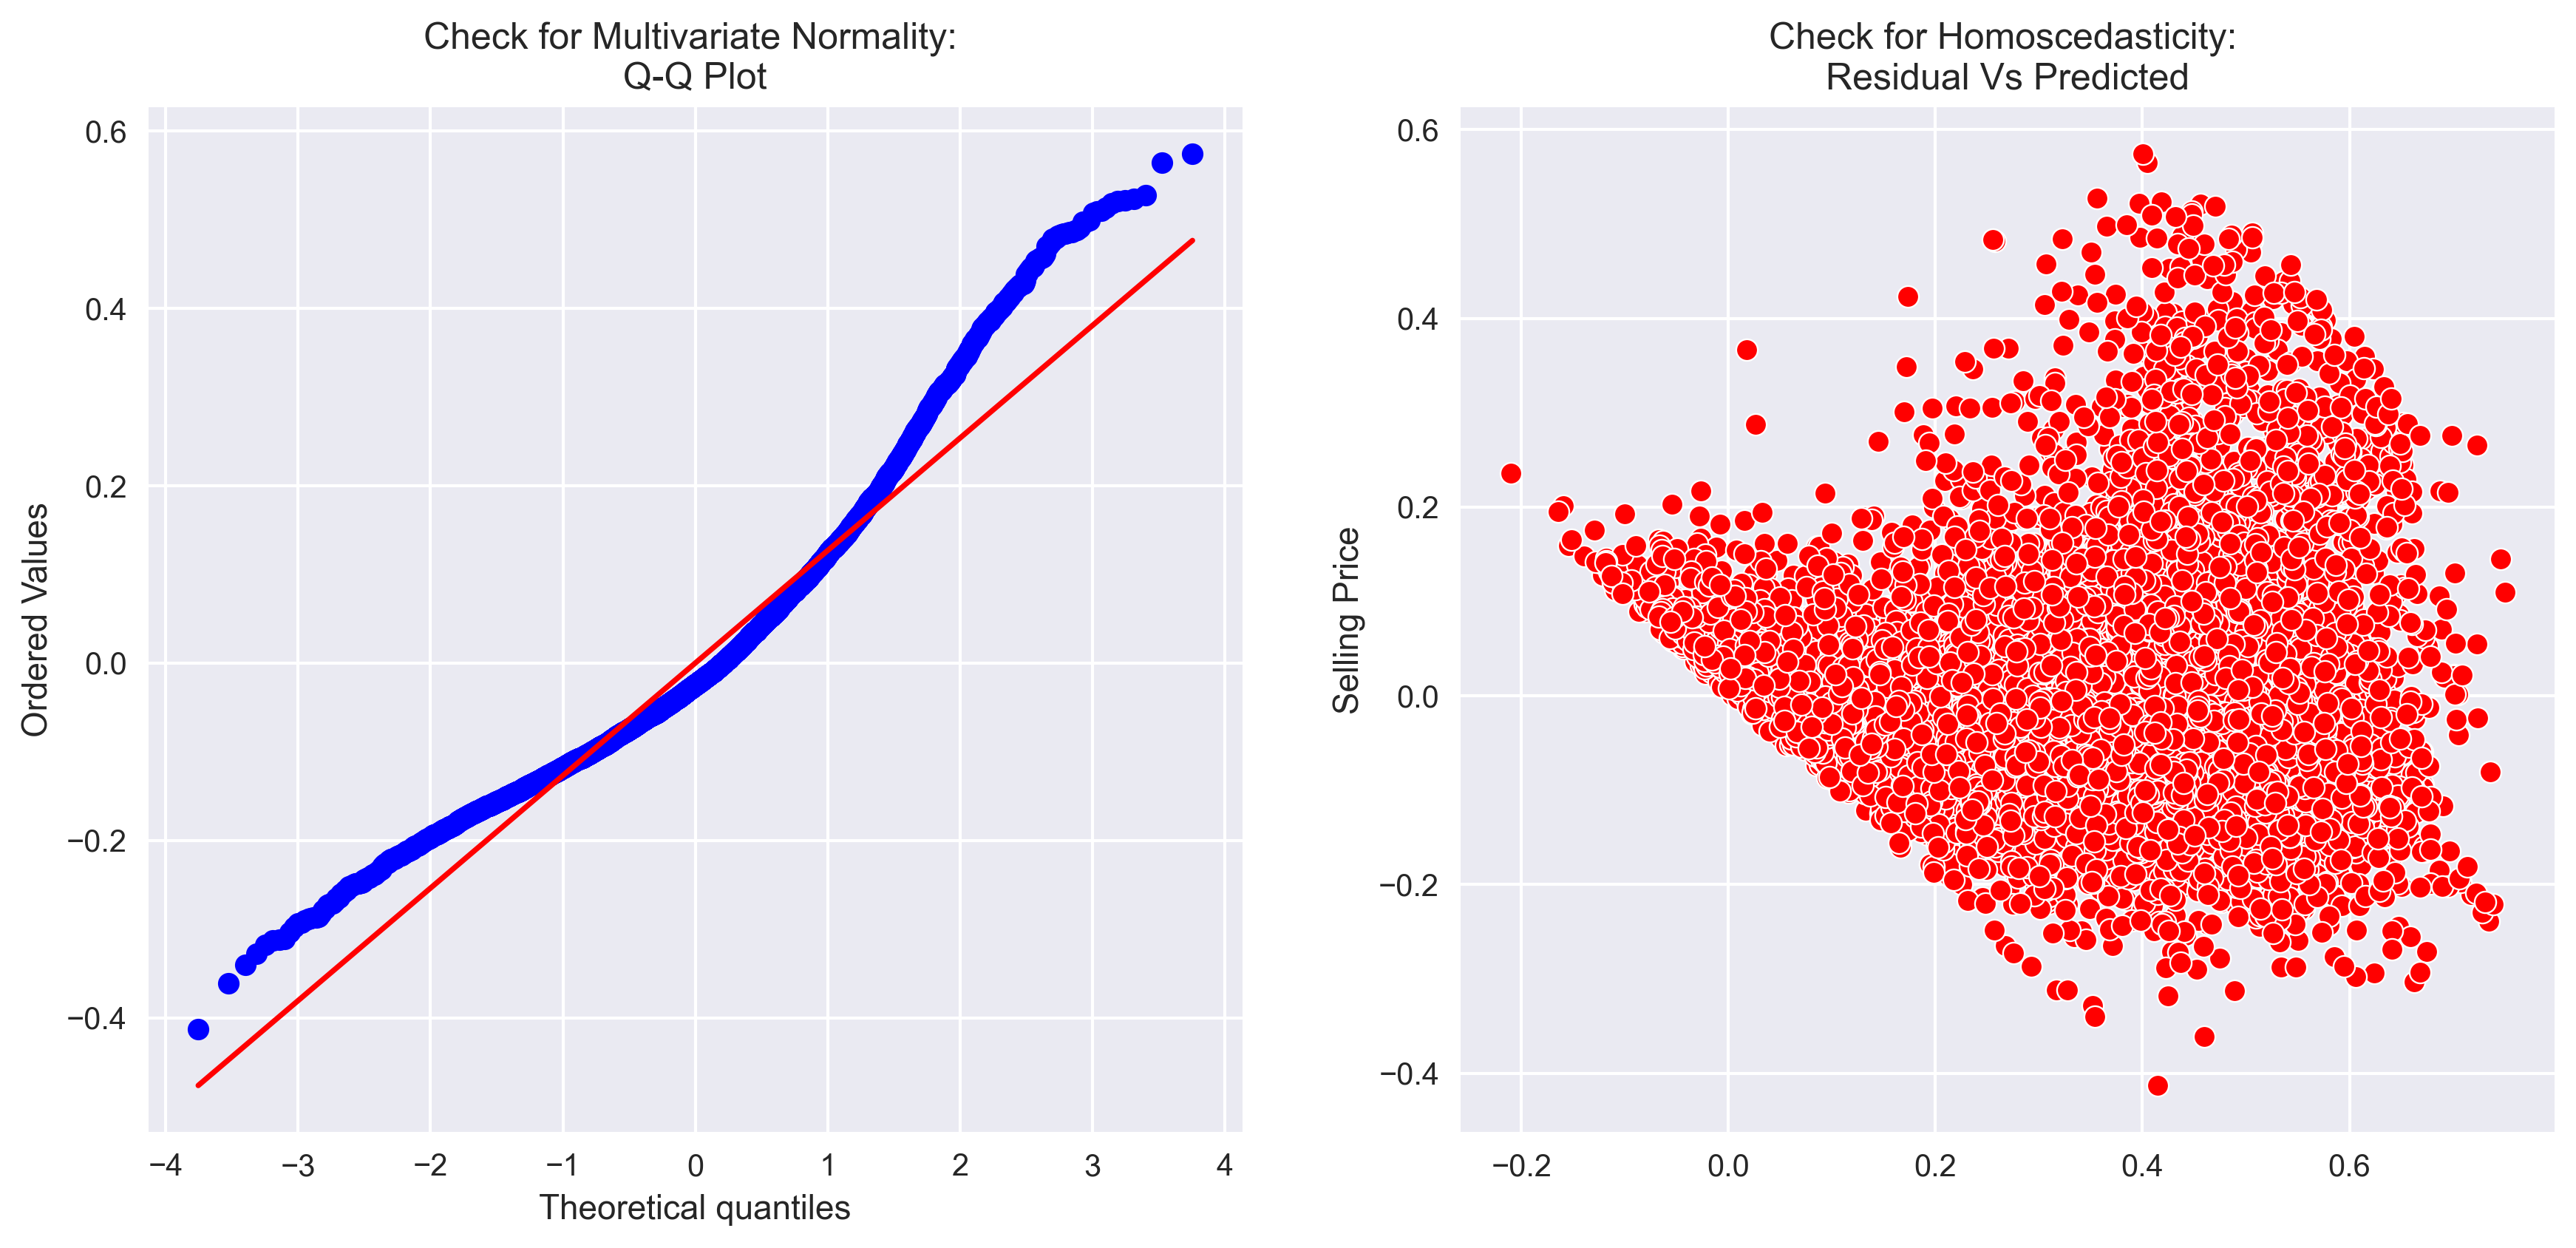

In [232]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')
ax[1].set_ylabel('Selling Price')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [233]:
# Check for Multicollinearity
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_data = pd.DataFrame()
VIF_data['feature'] = x.columns 
VIF_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
VIF_data

feature       VIF
0                   age  7.971107
1                  make  3.116051
2             condition  8.821703
3              odometer  8.981681
4   transmission_manual  1.095611
5            body_Coupe  1.542104
6        body_Hatchback  1.677472
7          body_Minivan  1.905897
8     body_Pickup Truck  2.144106
9              body_SUV  5.506370
10           body_Sedan  8.086168
11           body_Wagon  1.543641

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.

By removing the outliers, we've fixed many of the problems we've had before:
1. The scatterplot showing linearity (graph on the left), shows a very clear linear line compared to before
2. The Homoscedasticity issue has somewhat been resolved, now we don't observe the cone shape anymore and the data is more evenly
    ditributed, however more can be done to further remove that "cone" shape
3. We still have an R^2 of 0.6179255154477059, which means the model is still pretty accurate and better compared to before
4. The variance inflation factors (VIFs) were still below or equal to 10, which indictaes medium multicolinearity
5. The Q-Q plot now clearly doesn't have that "heavy tail" were before the graph had obvious outliers, now it has been minimzed and the plot is more linear
6. The check for residual error histogram isn't as right skewed as before

## Recomendations

Although this model fixed the outliers issue, however the Homoscedasticity issue can still be further adjusted and that cone shape can be fully removed with further cleaning